In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import to_hex
import seaborn as sns
import numpy as np
import os
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

In [2]:
df = pd.read_csv('C:/Users/Lympha/Desktop/temp_dir/result_dataframes/wcn_dataframe.csv')

In [3]:
print(df.info)

<bound method DataFrame.info of     Unnamed: 0    pos1:M    pos2:T    pos3:E    pos4:Y    pos5:K    pos6:L  \
0         1A2B  0.613620  0.741194  0.893730       NaN  1.001938  1.142155   
1         1AA9  0.572012  0.712572  0.844383  1.020772  1.049430  1.245395   
2         1AGP  0.509515  0.675077  0.804460  0.939516  1.010788  1.160664   
3         1AM4       NaN       NaN       NaN  0.669556       NaN       NaN   
4         1AN0  0.530860       NaN       NaN       NaN       NaN       NaN   
..         ...       ...       ...       ...       ...       ...       ...   
376       8DNJ  0.658352  0.725105  0.801150  0.951033  1.005913  1.168859   
377       8EBZ       NaN       NaN       NaN       NaN       NaN  0.386689   
378       8EZG  0.532138  0.684146  0.807077  0.955790  1.025675  1.172076   
379       8F0M       NaN       NaN  0.350666       NaN       NaN       NaN   
380       8IJ9  0.358526  0.533275  0.551459  0.663811  0.798362  1.167728   

       pos7:V    pos8:V    pos9

In [4]:
print(df.head)

<bound method NDFrame.head of     Unnamed: 0    pos1:M    pos2:T    pos3:E    pos4:Y    pos5:K    pos6:L  \
0         1A2B  0.613620  0.741194  0.893730       NaN  1.001938  1.142155   
1         1AA9  0.572012  0.712572  0.844383  1.020772  1.049430  1.245395   
2         1AGP  0.509515  0.675077  0.804460  0.939516  1.010788  1.160664   
3         1AM4       NaN       NaN       NaN  0.669556       NaN       NaN   
4         1AN0  0.530860       NaN       NaN       NaN       NaN       NaN   
..         ...       ...       ...       ...       ...       ...       ...   
376       8DNJ  0.658352  0.725105  0.801150  0.951033  1.005913  1.168859   
377       8EBZ       NaN       NaN       NaN       NaN       NaN  0.386689   
378       8EZG  0.532138  0.684146  0.807077  0.955790  1.025675  1.172076   
379       8F0M       NaN       NaN  0.350666       NaN       NaN       NaN   
380       8IJ9  0.358526  0.533275  0.551459  0.663811  0.798362  1.167728   

       pos7:V    pos8:V    pos9:V

In [5]:
metadata_df = pd.read_csv('C:/Users/Lympha/Desktop/temp_dir/result_dataframes/metadata_dataframe.csv')


metadata_df.head()

Unnamed: 0                                              Title  \
0       1A2B             HUMAN RHOA COMPLEXED WITH GTP ANALOGUE   
1       1AA9  HUMAN C-HA-RAS(1-171)(DOT)GDP, NMR, MINIMIZED ...   
2       1AGP  THREE-DIMENSIONAL STRUCTURES AND PROPERTIES OF...   
3       1AM4  COMPLEX BETWEEN CDC42HS.GMPPNP AND P50 RHOGAP ...   
4       1AN0                                CDC42HS-GDP COMPLEX   

                                   Structure Details Source Organism  \
0                                                NaN    Homo sapiens   
1                                                NaN    Homo sapiens   
2  C-H-RAS P21 PROTEIN MUTANT WITH GLY 12 REPLACE...    Homo sapiens   
3                                                NaN    Homo sapiens   
4                                                NaN    Homo sapiens   

   Taxonomy ID                                           Abstract  \
0         9606  The 2.4-A resolution crystal structure of a do...   
1         9606  The backbone 1H, 13C, and 15N resonances of th...   
2         9606  The three-dimensional structures and biochemic...   
3         9606  Small G proteins transduce signals from plasma...   
4         9606                                       No DOI found   

              Method  Resolution  Original Number of Models  \
0  x-ray diffraction         2.4                          1   
1       solution nmr         NaN                          1   
2  x-ray diffraction         2.3                          1   
3  x-ray diffraction         2.7                          1   
4  x-ray diffraction         2.8                          1   

   Original Number of Chains  ... Number of ILE Number of GLN Number of ASN  \
0                          1  ...            10             5             6   
1                          1  ...            11            11             4   
2                          1  ...            11            11             4   
3                          6  ...             8             6             5   
4                          2  ...             8             6             5   

   Number of HIS  Number of PHE  Number of ASP  Number of PRO Number of ARG  \
0            2.0              7             15           11.0            10   
1            3.0              5             14            3.0            12   
2            3.0              5             15            3.0            11   
3            2.0              8             11           12.0             5   
4            2.0              8             11           15.0             6   

  Number of CYS Number of TRP  
0           5.0           2.0  
1           3.0           NaN  
2           3.0           NaN  
3           5.0           1.0  
4           6.0           1.0  

[5 rows x 42 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

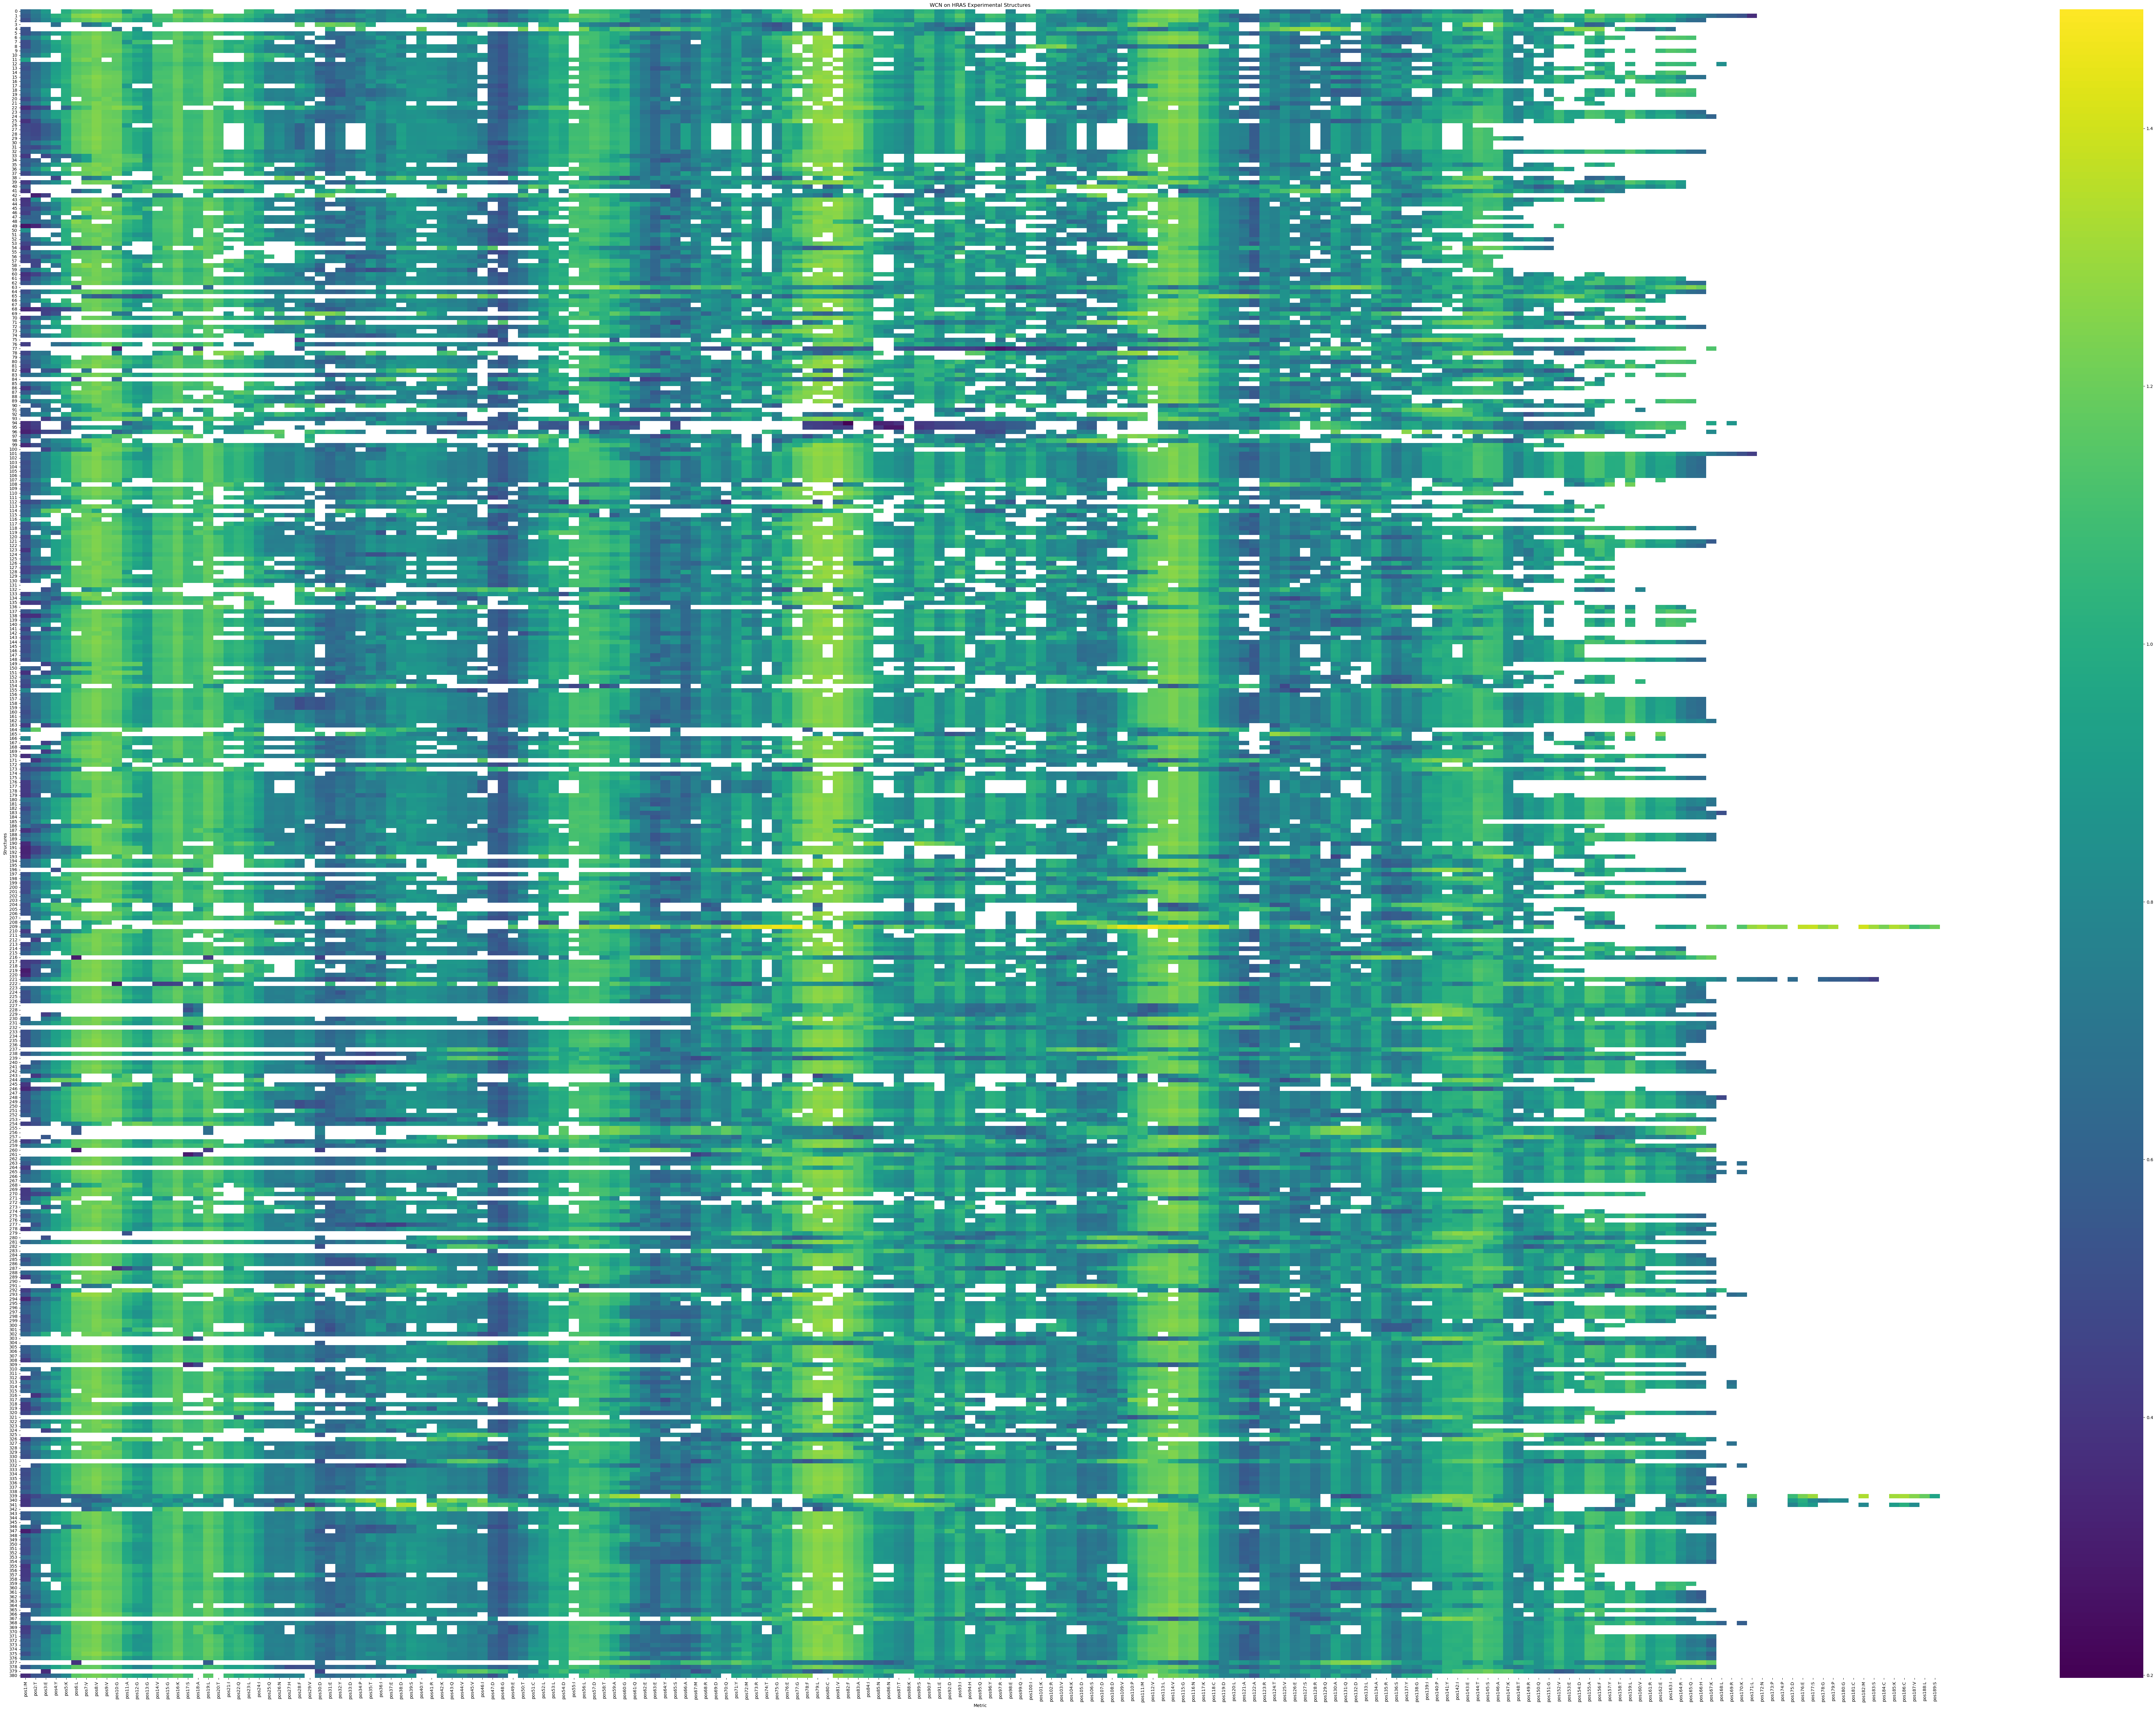

In [6]:
plt.figure(figsize=(100,70))
sns.heatmap(df.drop(columns=['Unnamed: 0']), cmap='viridis')
plt.title('WCN on HRAS Experimental Structures')
plt.xlabel('Metric')
plt.ylabel('Structures')
plt.show

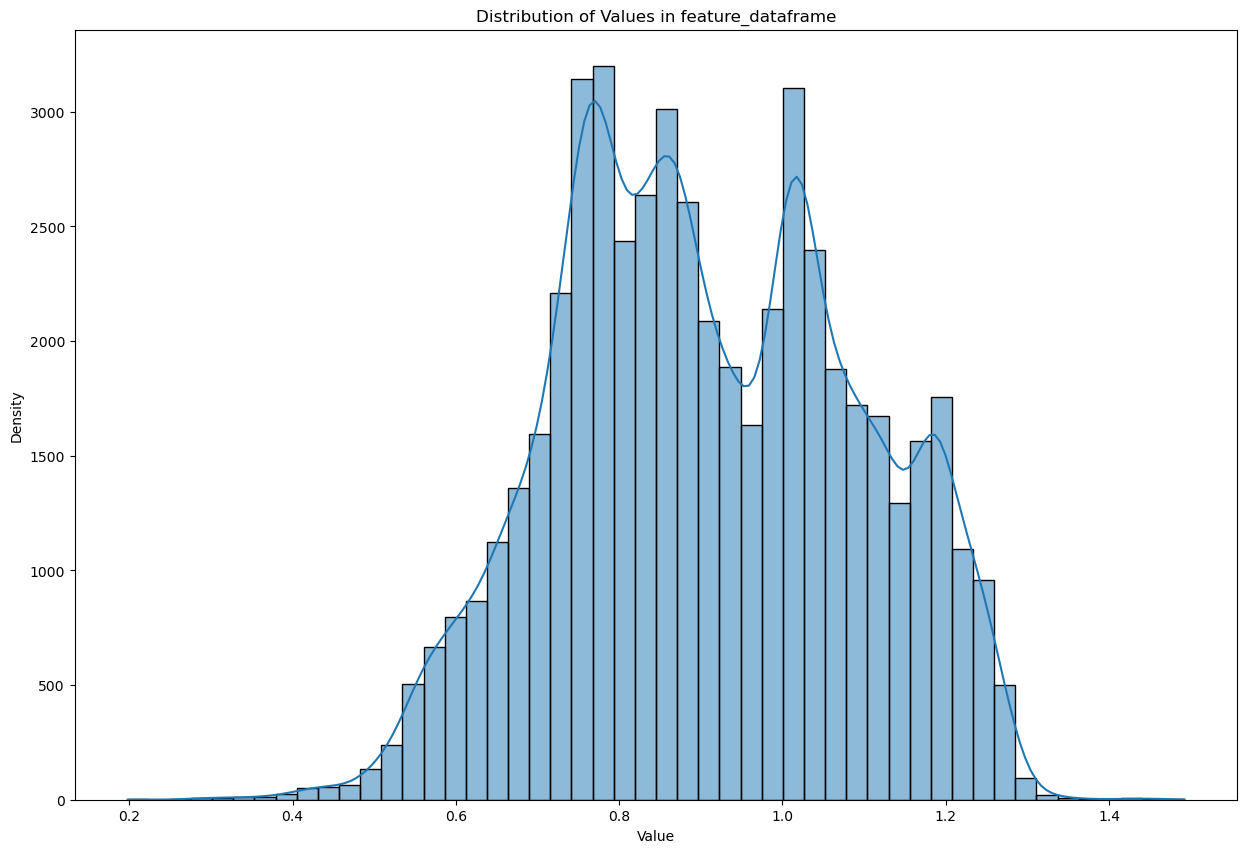

In [7]:
plt.figure(figsize=(15,10))
sns.histplot(df.drop(columns=['Unnamed: 0']).values.flatten(), bins=50, kde=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution of Values in feature_dataframe')
plt.show()

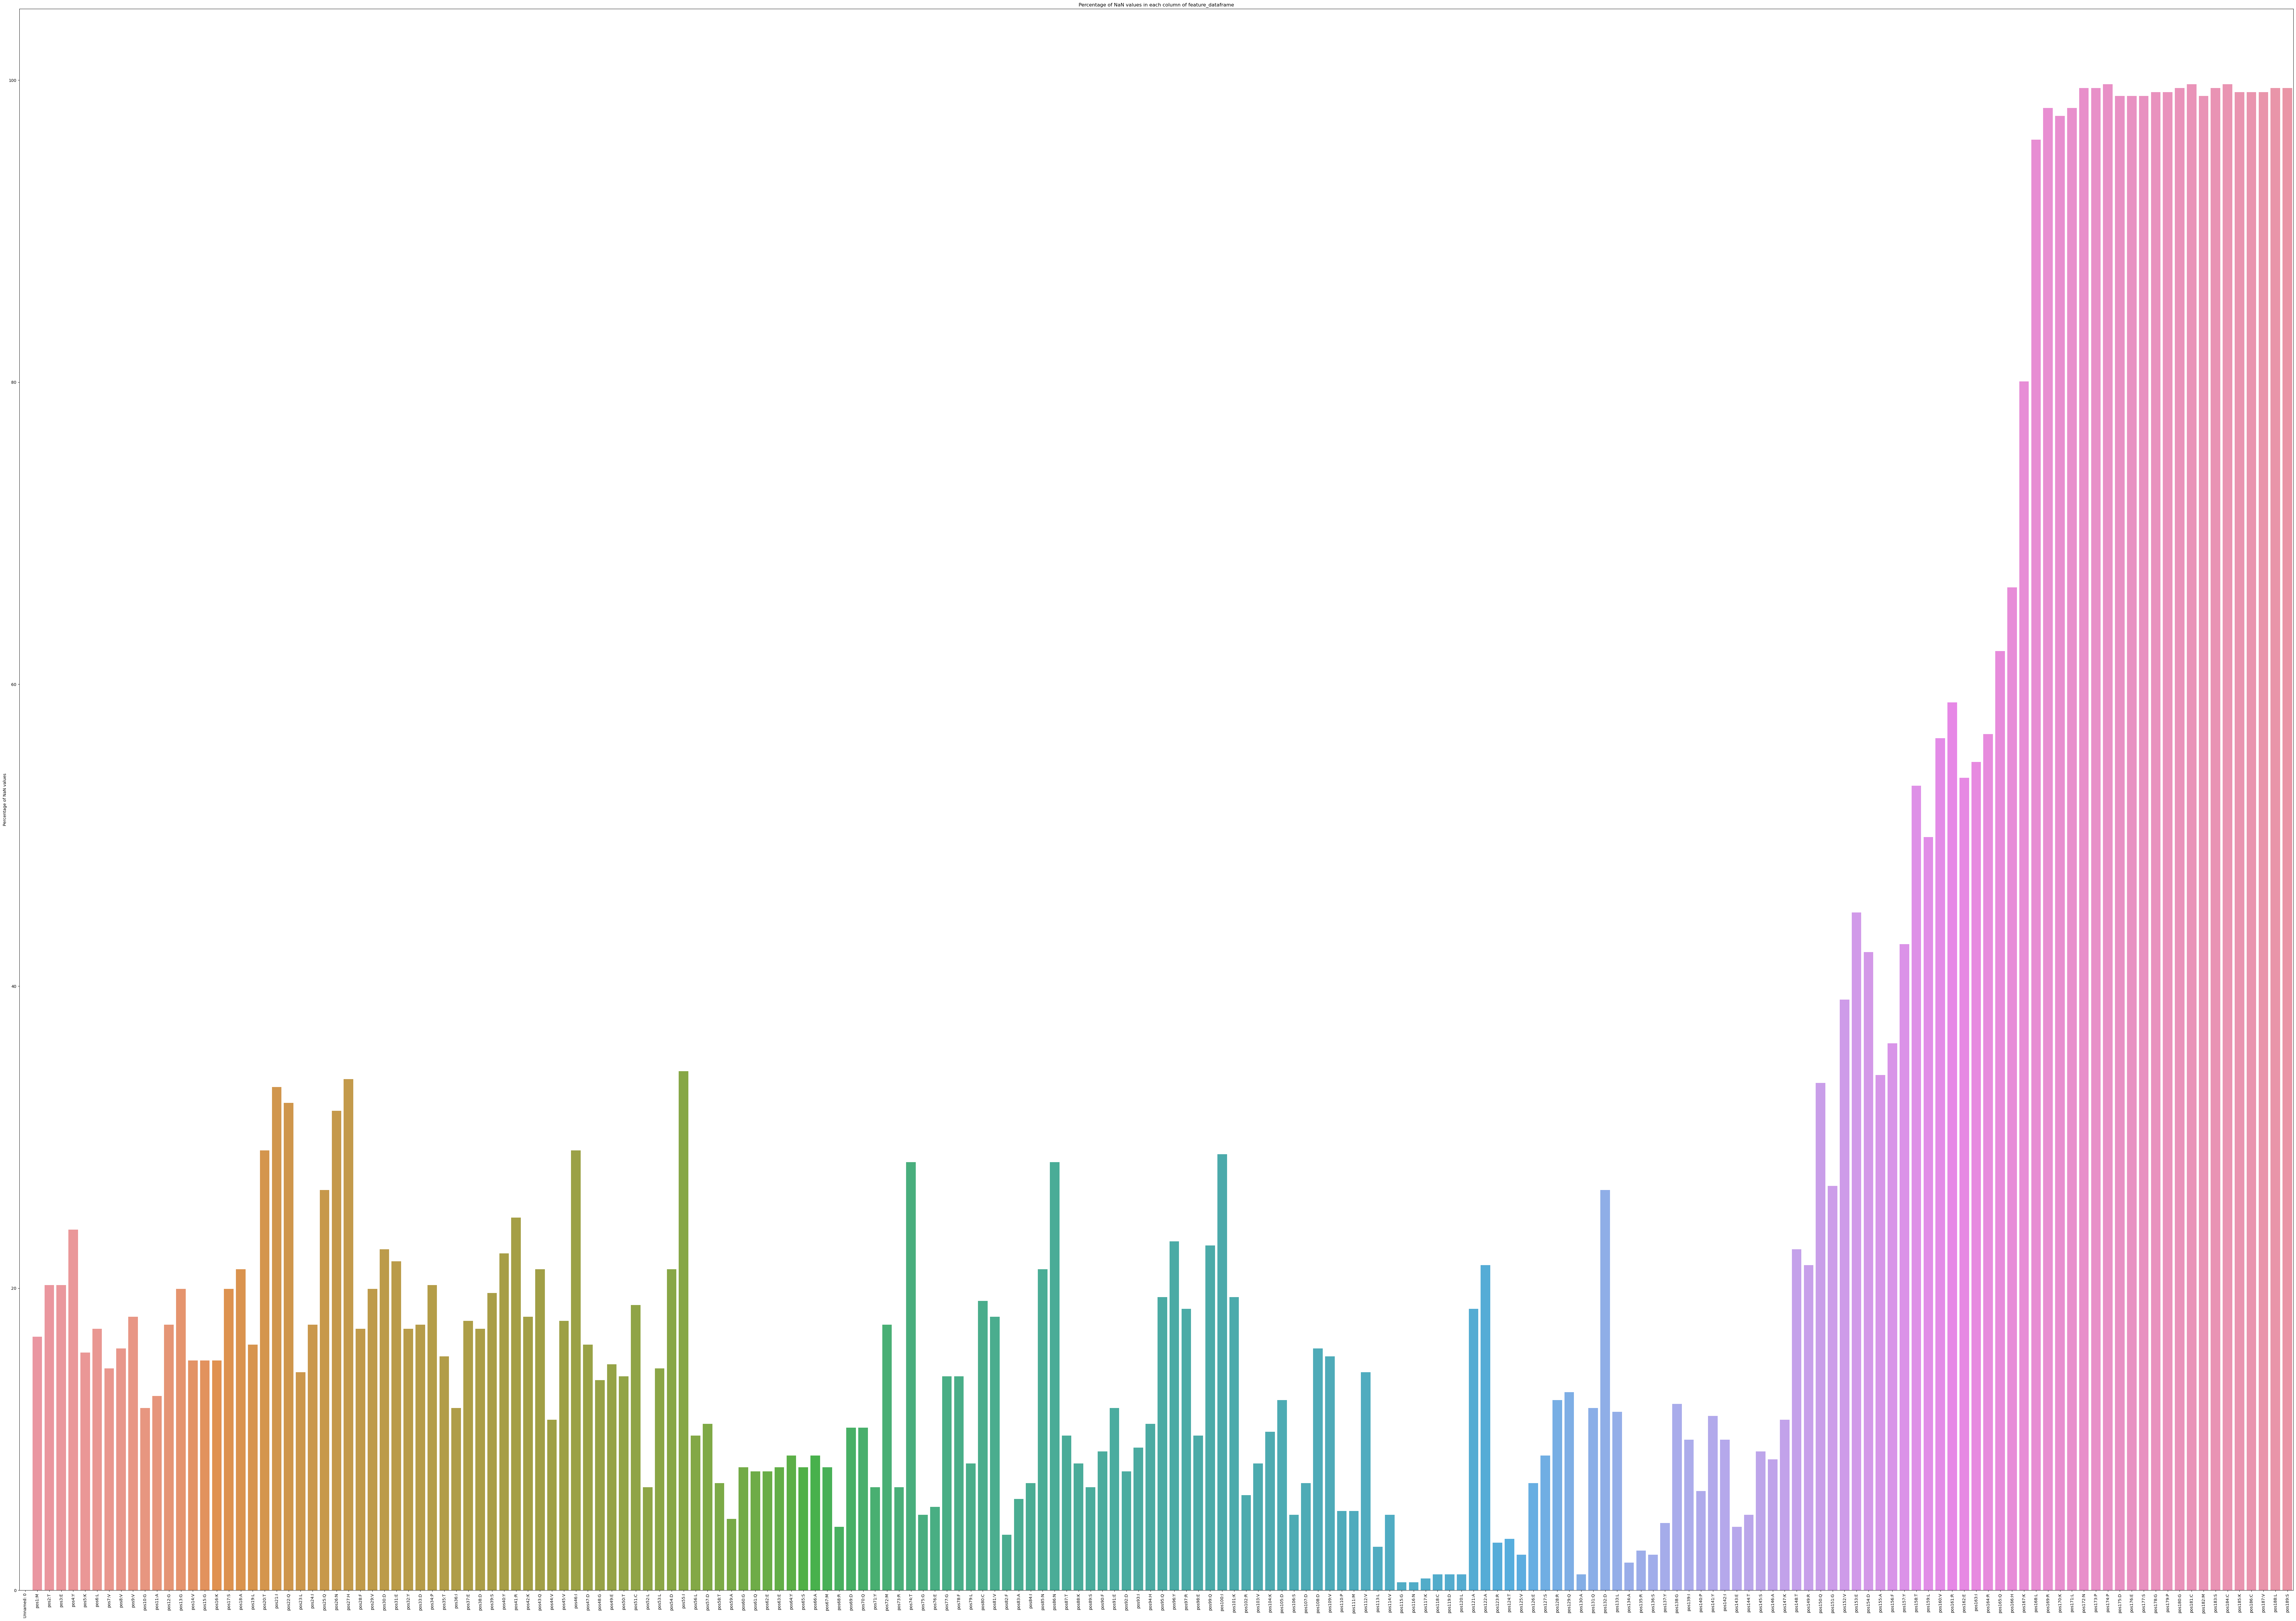

In [8]:
nan_percentage = df.isnull().mean() * 100


plt.figure(figsize=(100,70))
sns.barplot(x=nan_percentage.index, y=nan_percentage.values)
plt.xticks(rotation=90)
plt.ylabel('Percentage of NaN values')
plt.title('Percentage of NaN values in each column of feature_dataframe')
plt.show()

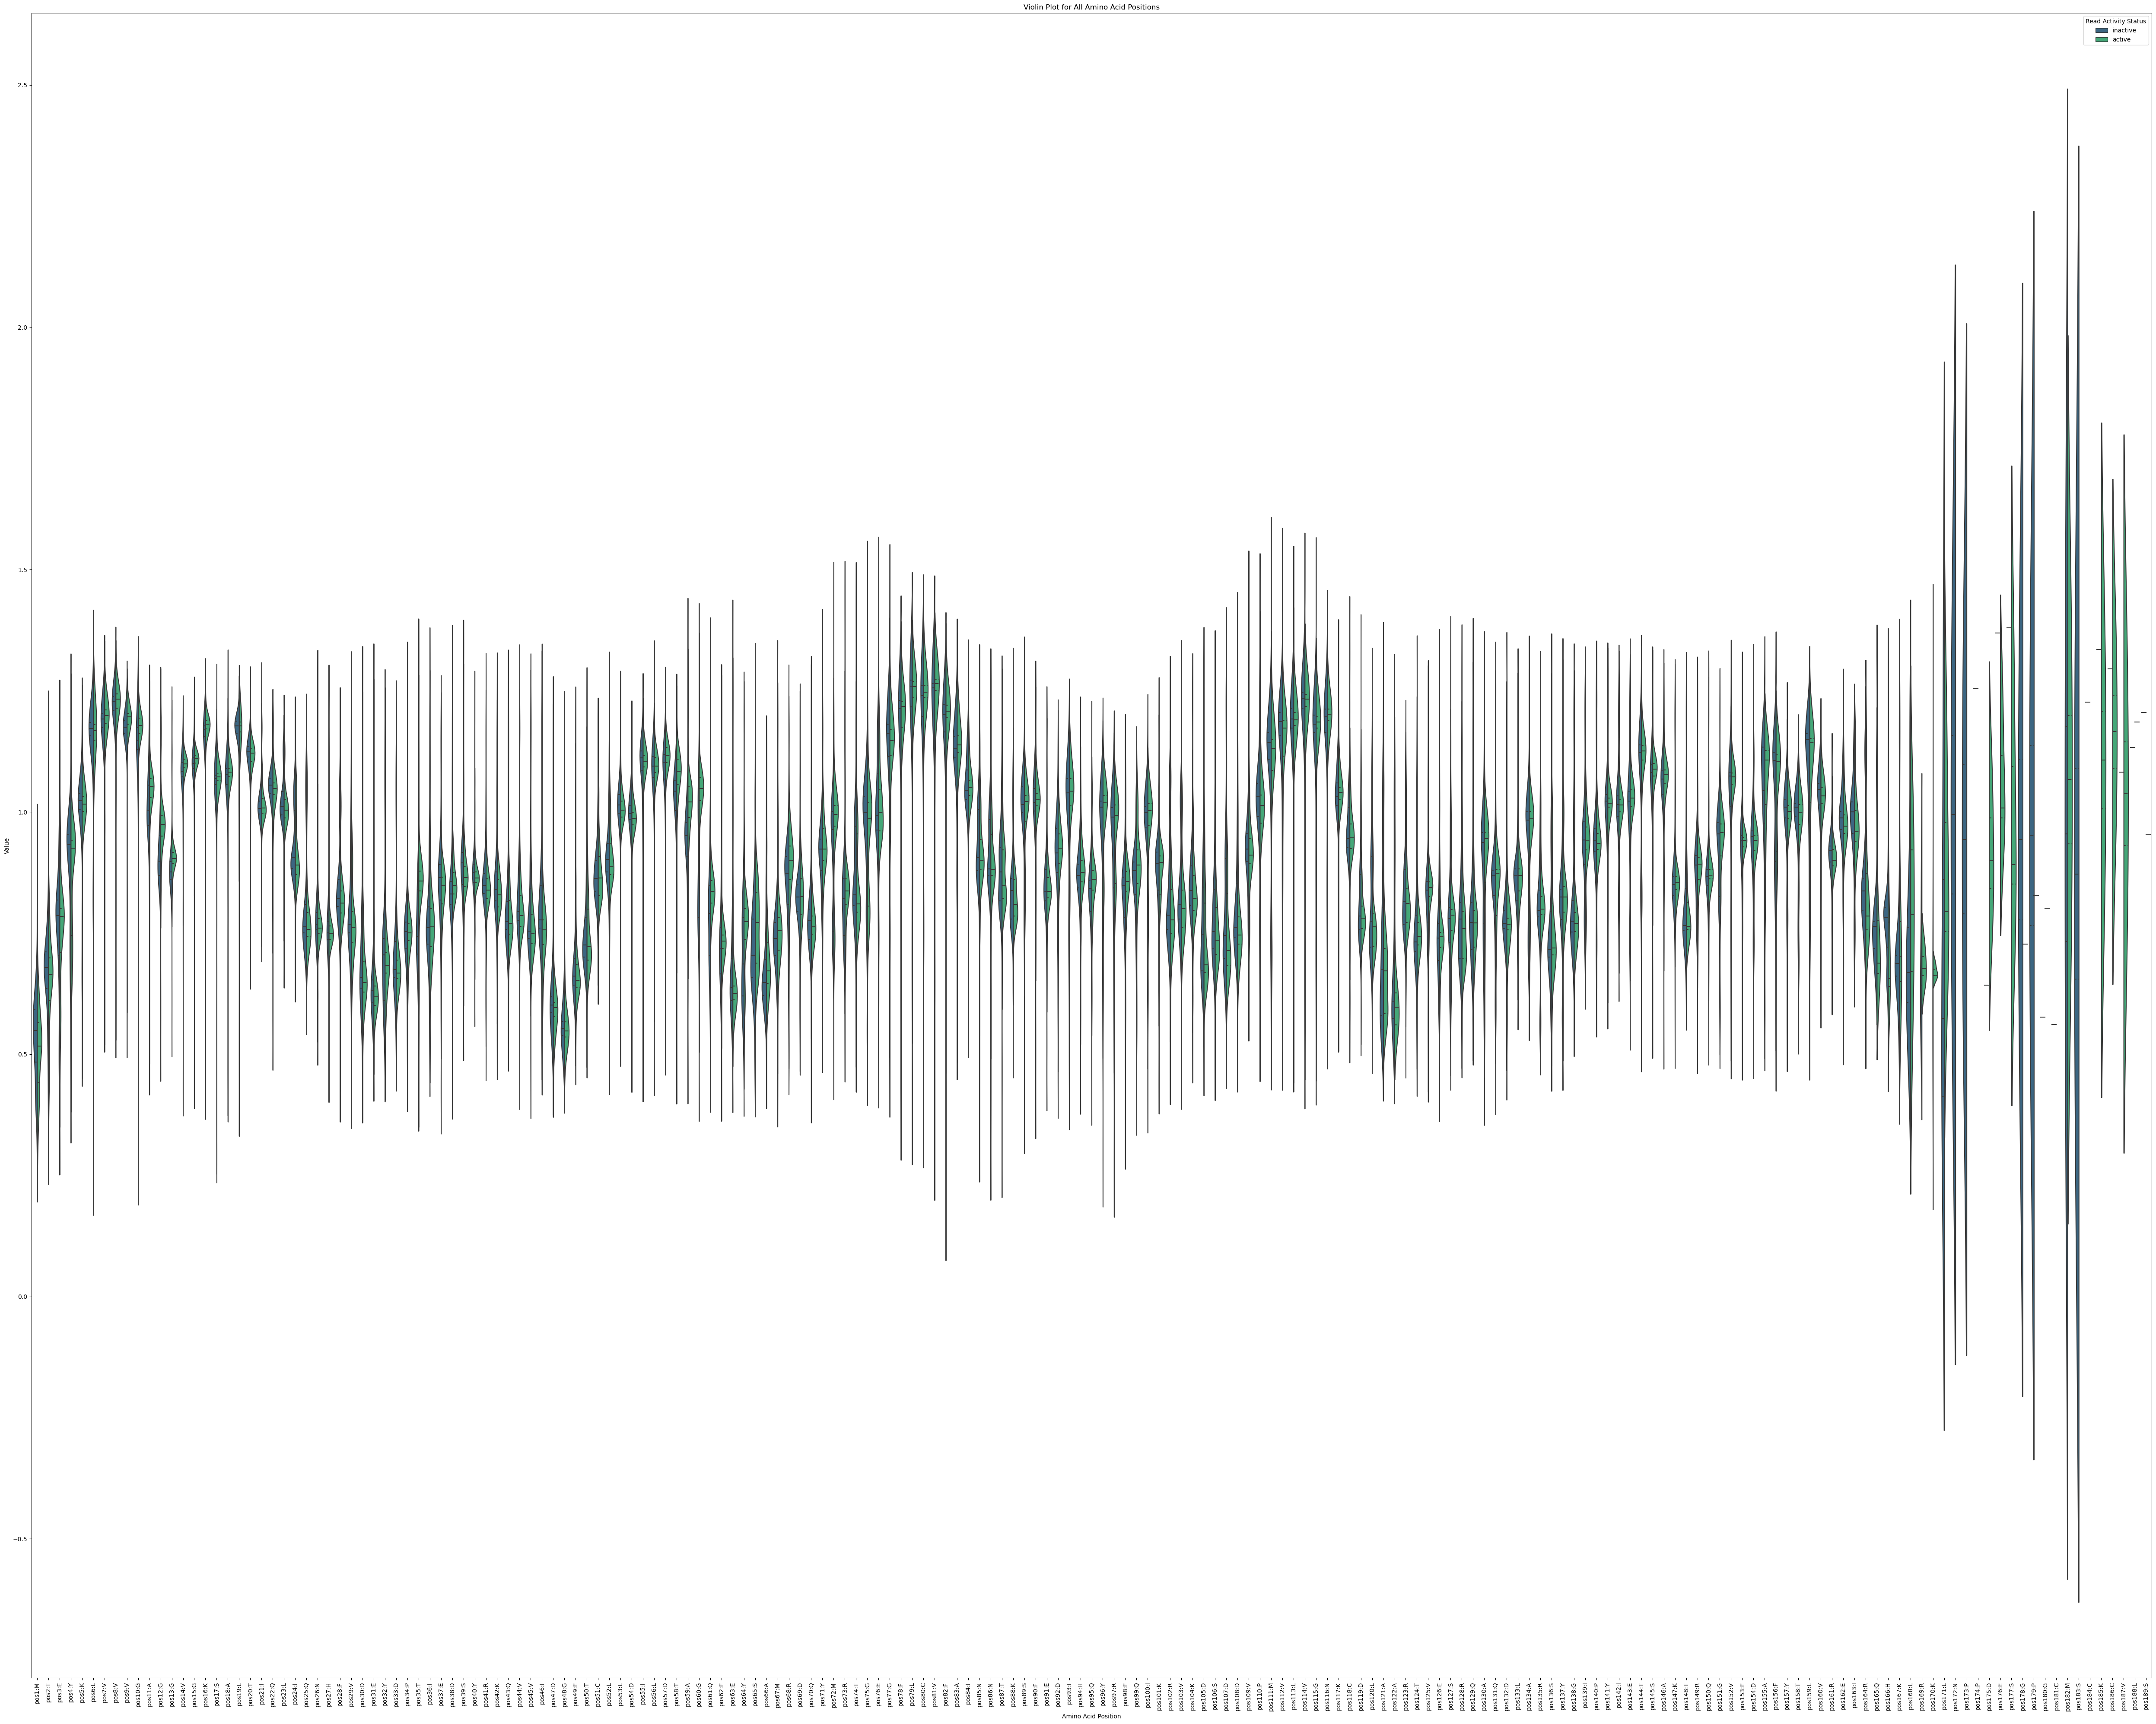

In [9]:
merged_nonnorm_df = pd.merge(df, metadata_df[['Unnamed: 0', 'Read Activity Status']], on='Unnamed: 0')

melted_nonnorm = pd.melt(merged_nonnorm_df, id_vars=['Unnamed: 0', 'Read Activity Status'], var_name='Amino Acid Position', value_name='Value')


plt.figure(figsize=(50,40))


sns.violinplot(x="Amino Acid Position", y="Value", hue="Read Activity Status", data=melted_nonnorm, split=True, inner="quart", palette="viridis")


plt.xticks(rotation=90)


plt.title('Violin Plot for All Amino Acid Positions')
plt.xlabel('Amino Acid Position')
plt.ylabel('Value')
plt.legend(title='Read Activity Status')


plt.tight_layout()


plt.show()

In [10]:
protein_codes = df['Unnamed: 0']


feature_df_numeric = df.drop(columns=['Unnamed: 0'])


scaler = StandardScaler()
feature_normalized = scaler.fit_transform(feature_df_numeric)


feature_normalized_df = pd.DataFrame(feature_normalized, columns=feature_df_numeric.columns)


feature_normalized_df.fillna(0, inplace=True)

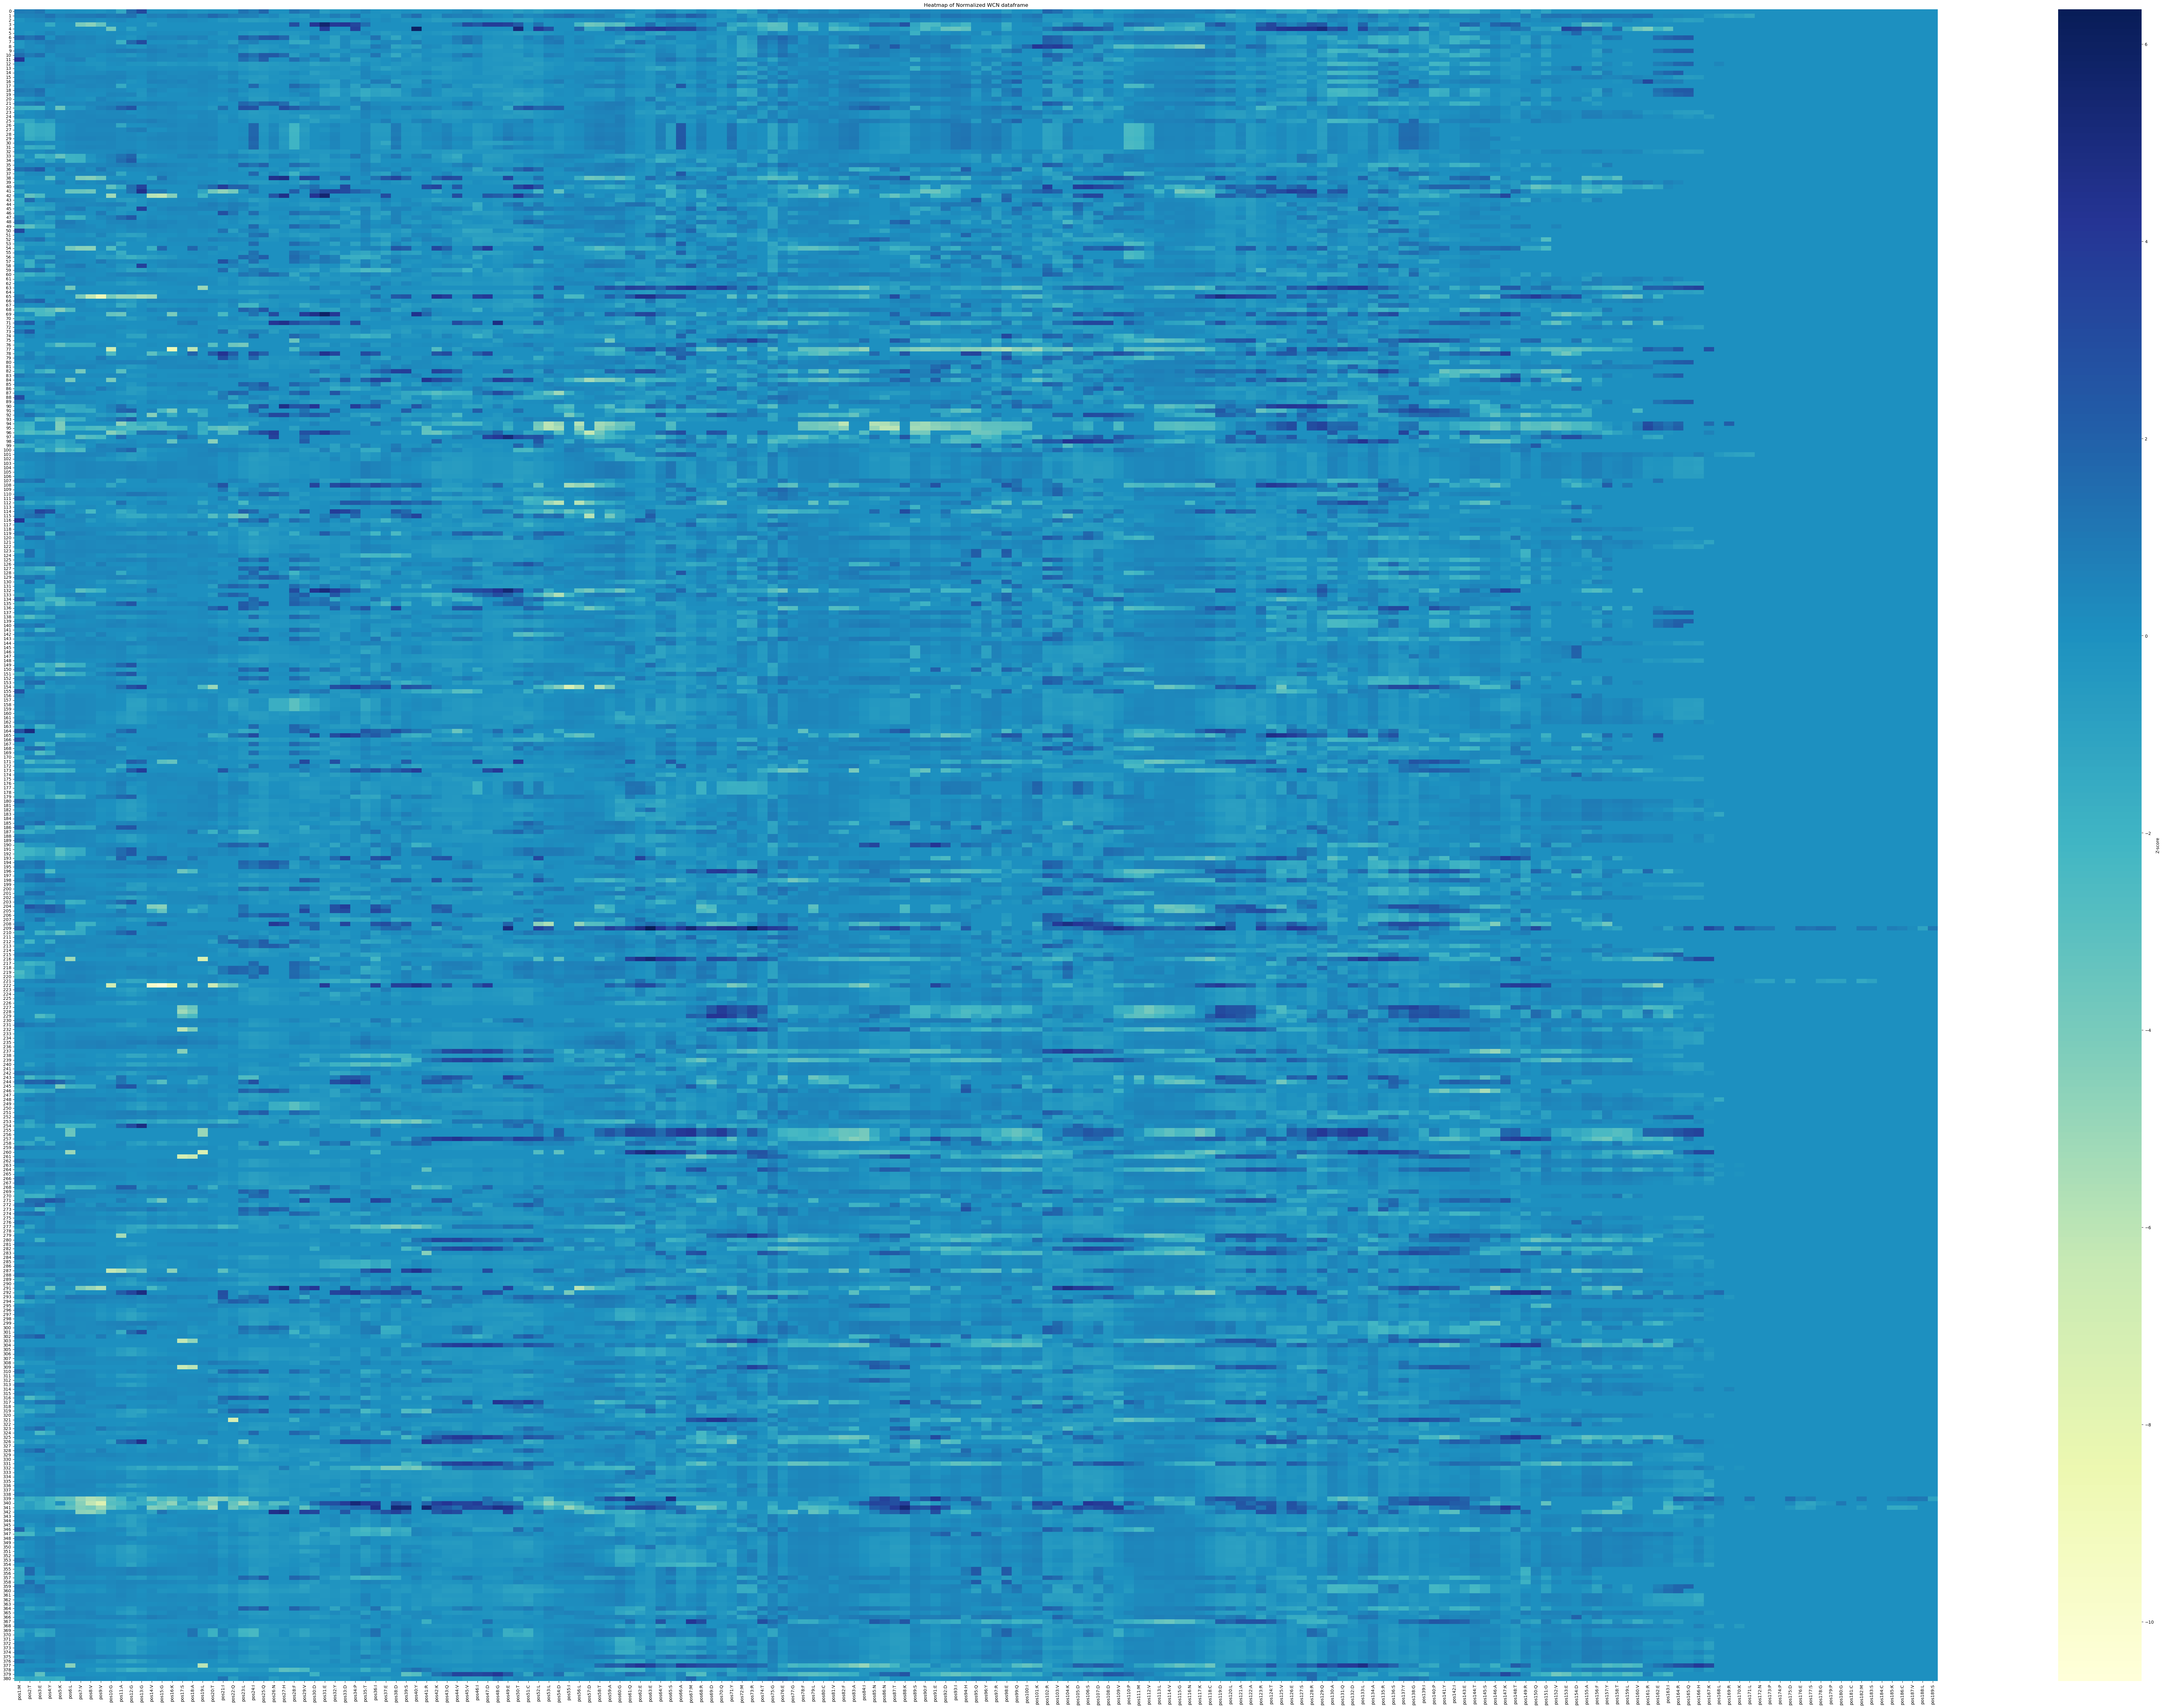

In [11]:

plt.figure(figsize=(100,70))
sns.heatmap(feature_normalized_df, cmap="YlGnBu", cbar_kws={'label': 'Z-score'})
plt.title('Heatmap of Normalized WCN dataframe')
plt.show()

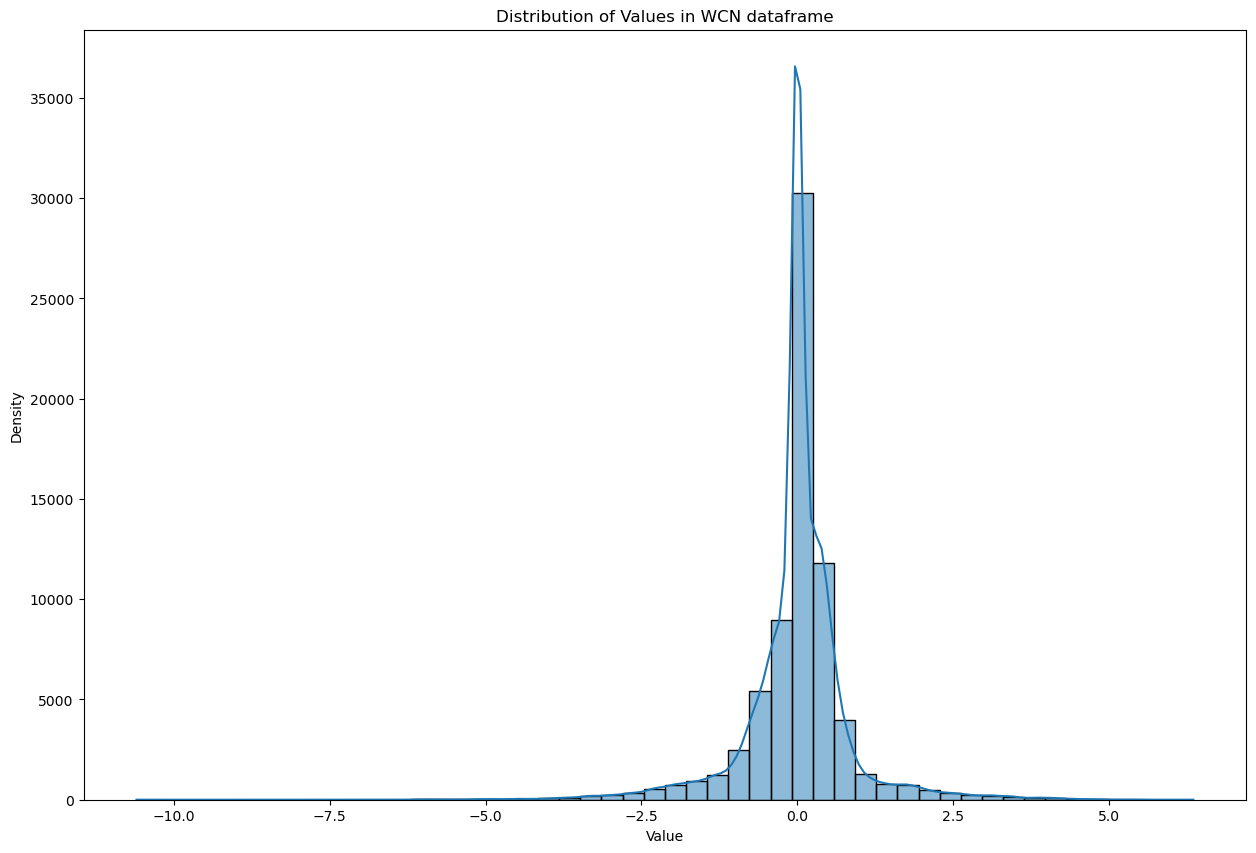

In [12]:
plt.figure(figsize=(15,10))
sns.histplot(feature_normalized_df.values.flatten(), bins=50, kde=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution of Values in WCN dataframe')
plt.show()

In [13]:
merged_df = pd.merge(feature_normalized_df, metadata_df, left_on=protein_codes, right_on="Unnamed: 0")


X = feature_normalized_df
y = metadata_df["Read Activity Status"]
y_factorized = pd.factorize(y)[0]


merged_df.head()

pos1:M    pos2:T    pos3:E   pos4:Y    pos5:K    pos6:L    pos7:V  \
0  0.877253  0.822723  1.092406  0.00000  0.112693  0.170658  0.010683   
1  0.460621  0.549048  0.705383  1.19877  0.547791  0.816144  0.934254   
2 -0.165170  0.190533  0.392275  0.58578  0.193777  0.286386  0.278049   
3  0.000000  0.000000  0.000000 -1.45079  0.000000  0.000000 -4.051603   
4  0.048560  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   

     pos8:V    pos9:V   pos10:G  ...  Number of ILE  Number of GLN  \
0 -0.015162 -0.075974  0.192912  ...             10              5   
1  0.970780  1.147667  0.849653  ...             11             11   
2  0.208847  0.059412  0.291119  ...             11             11   
3 -4.535948 -3.352216  0.000000  ...              8              6   
4  0.000000  0.000000 -3.652692  ...              8              6   

   Number of ASN  Number of HIS  Number of PHE  Number of ASP  Number of PRO  \
0              6            2.0              7             15           11.0   
1              4            3.0              5             14            3.0   
2              4            3.0              5             15            3.0   
3              5            2.0              8             11           12.0   
4              5            2.0              8             11           15.0   

   Number of ARG  Number of CYS  Number of TRP  
0             10            5.0            2.0  
1             12            3.0            NaN  
2             11            3.0            NaN  
3              5            5.0            1.0  
4              6            6.0            1.0  

[5 rows x 231 columns]

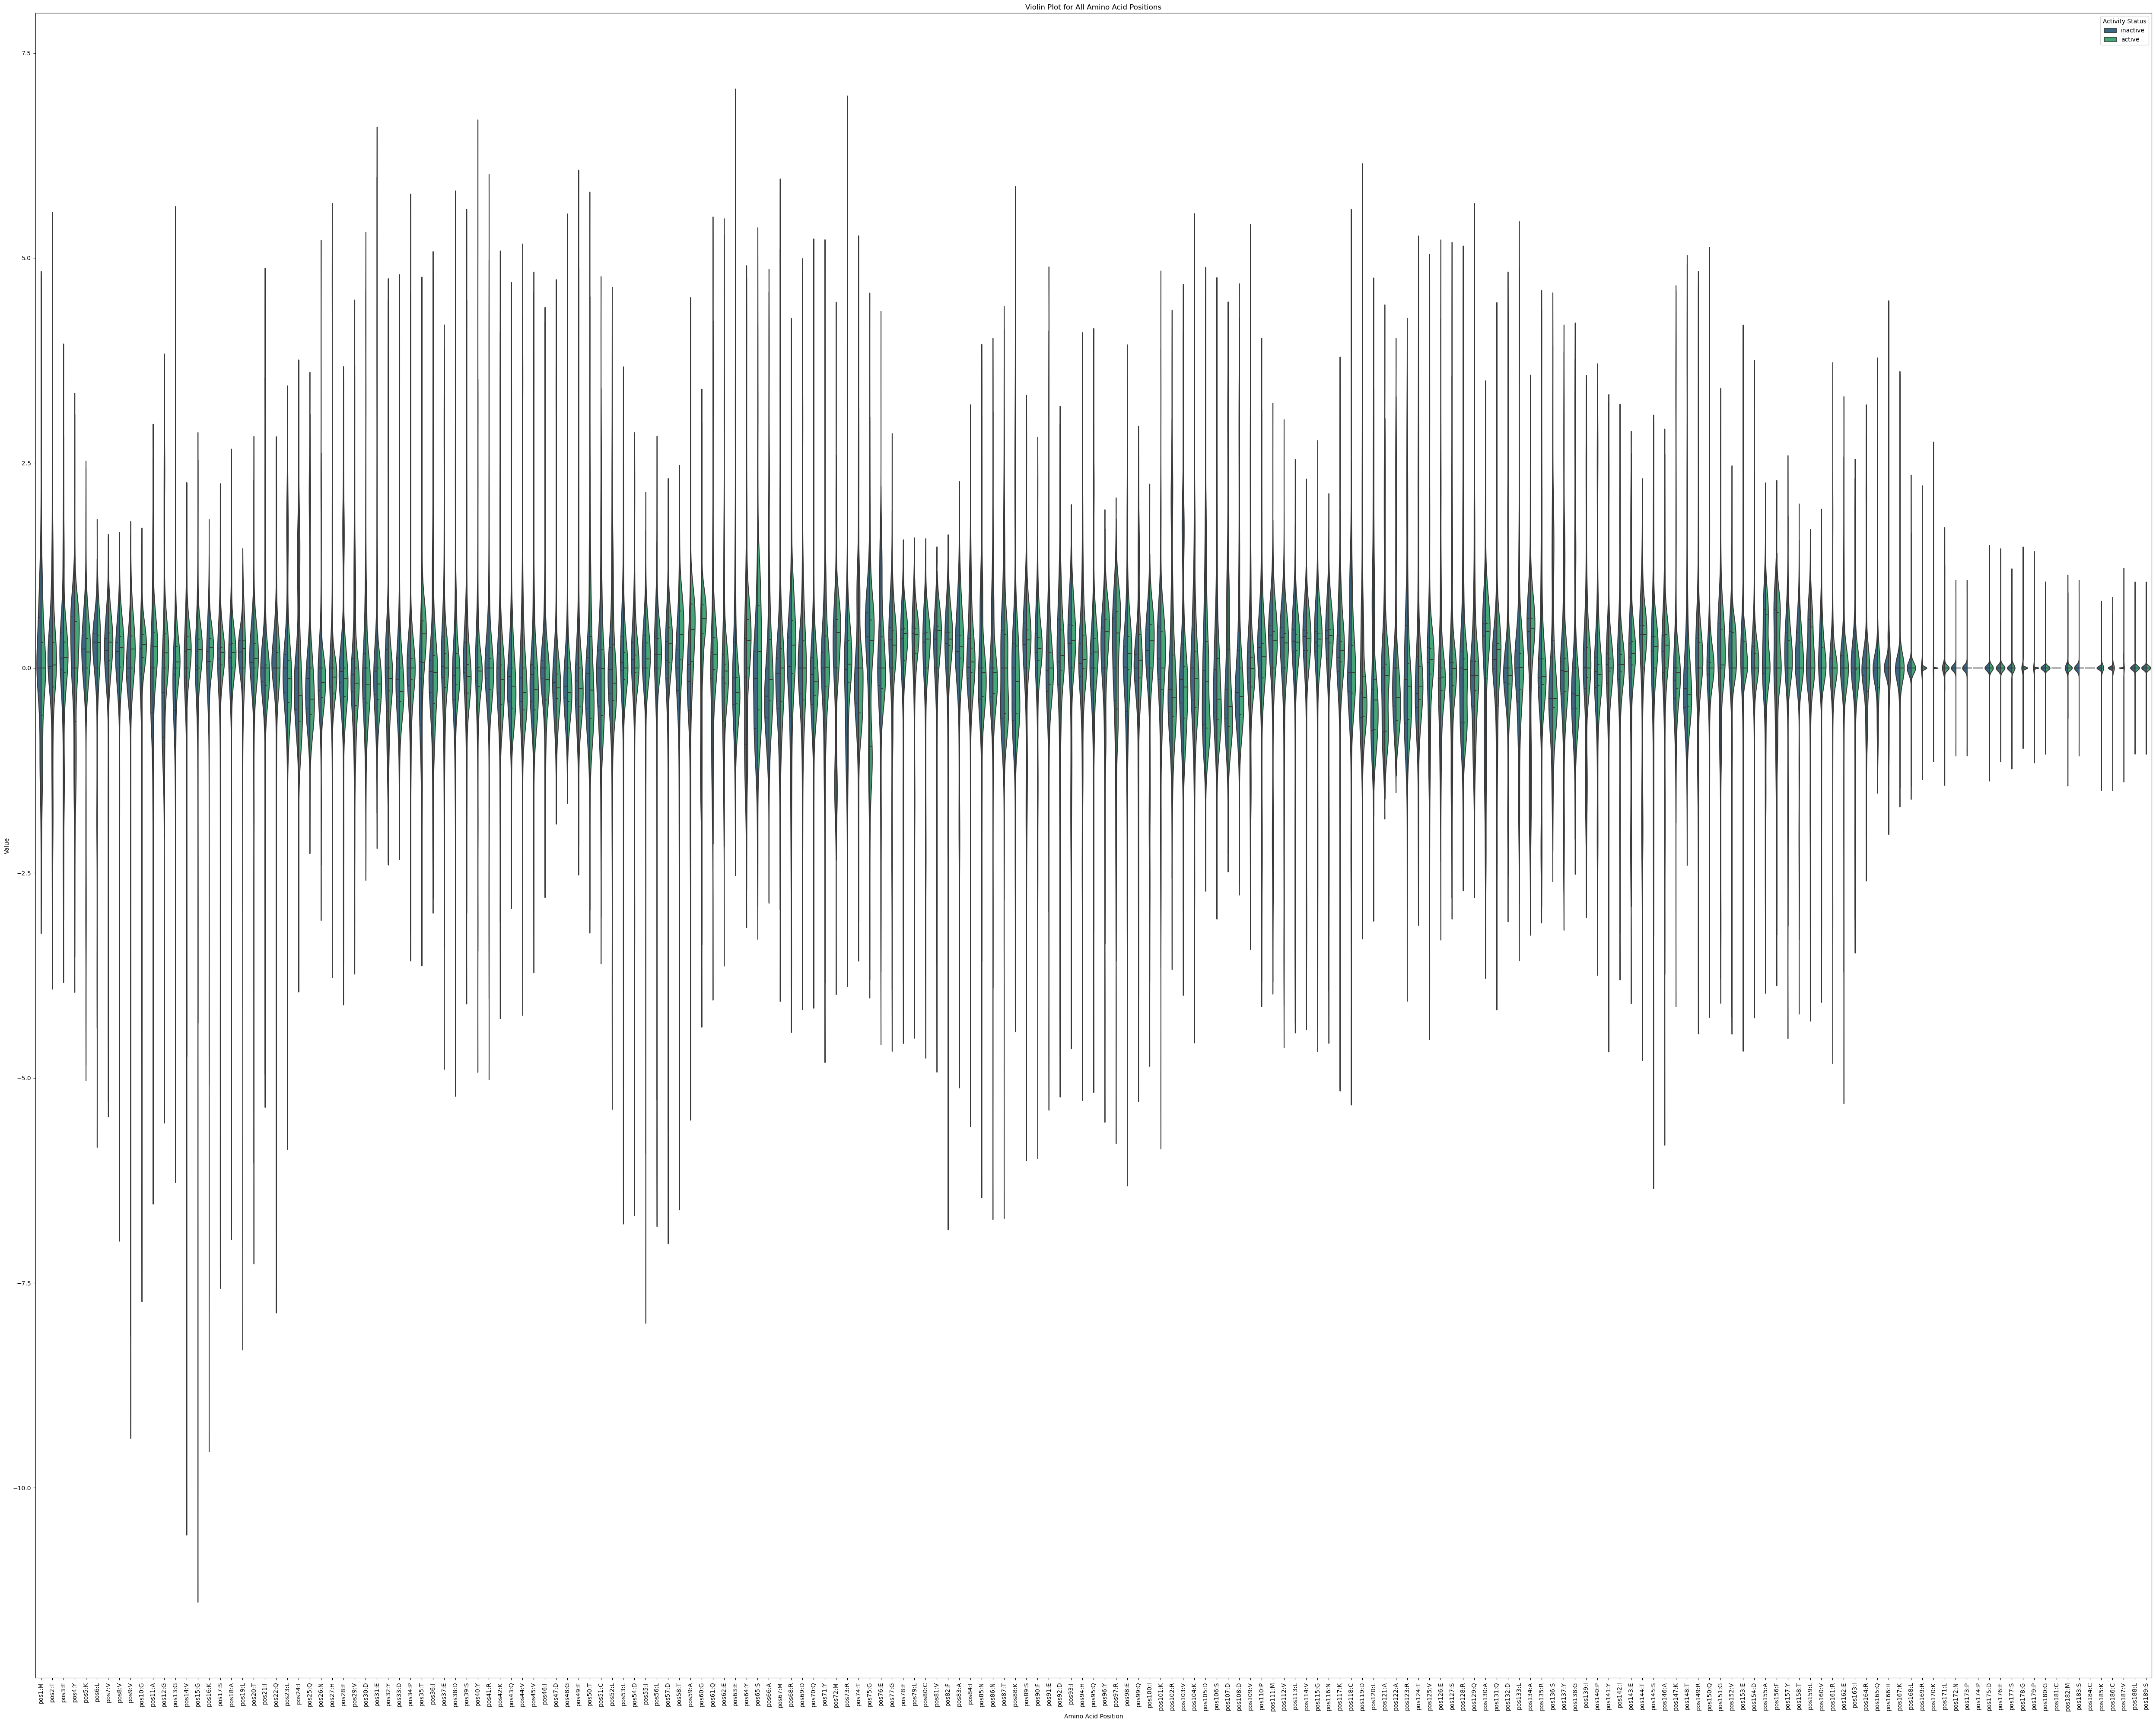

In [14]:
melted_data = pd.melt(X.iloc[:, :len(feature_normalized_df.columns)], value_vars=X.iloc[:, :len(feature_normalized_df.columns)].columns)
melted_data['Activity Status'] = np.tile(y, len(X.columns[:len(feature_normalized_df.columns)]))


plt.figure(figsize=(50,40))
sns.violinplot(x="variable", y="value", hue="Activity Status", data=melted_data, split=True, inner="quart", palette="viridis")
plt.xticks(rotation=90)
plt.title('Violin Plot for All Amino Acid Positions')
plt.xlabel('Amino Acid Position')
plt.ylabel('Value')
plt.legend(title='Activity Status')
plt.tight_layout()
plt.show()

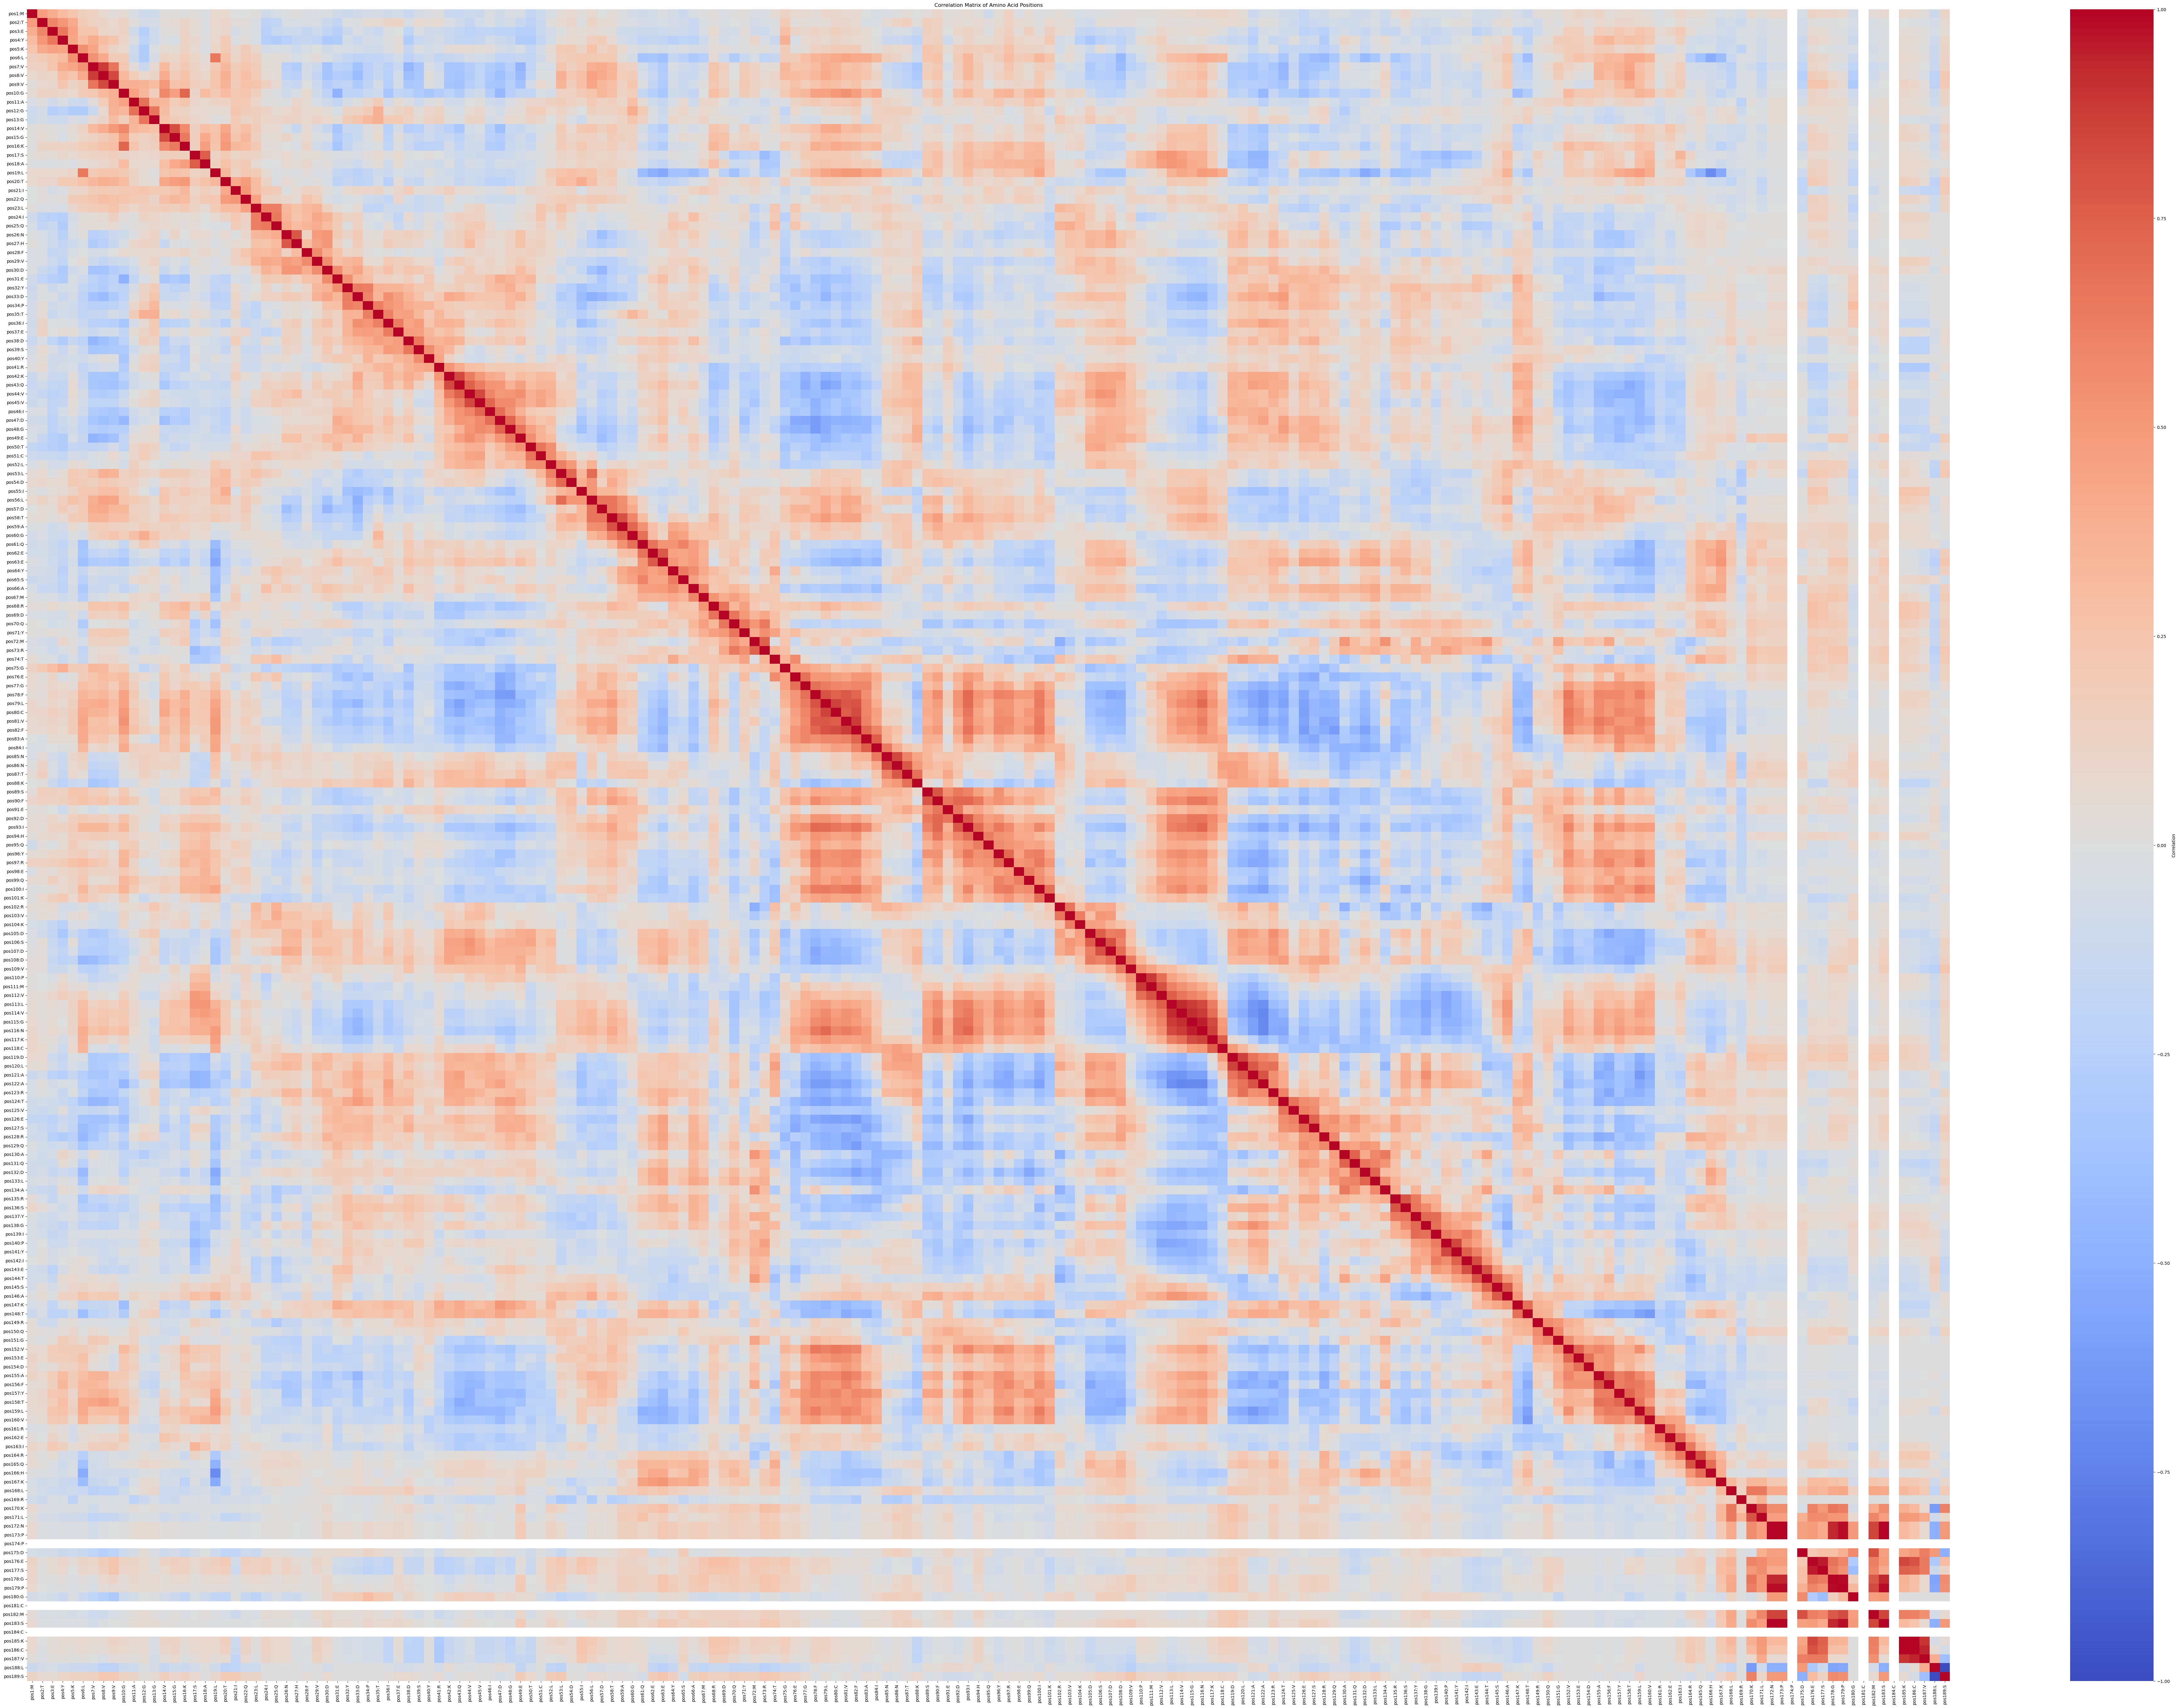

pos60:G    0.560507
pos59:A    0.414094
pos58:T    0.338660
pos61:Q    0.306252
pos12:G    0.288751
pos35:T    0.286756
pos65:S    0.226854
pos64:Y    0.226347
pos10:G    0.221812
pos11:A    0.212485
dtype: float64

In [15]:
correlation_matrix = X.iloc[:, :len(feature_normalized_df.columns)].corr()


correlation_with_target = X.iloc[:, :len(feature_normalized_df.columns)].apply(lambda x: x.corr(pd.Series(y_factorized)))


plt.figure(figsize=(100, 70))
sns.heatmap(correlation_matrix, cmap="coolwarm", vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix of Amino Acid Positions')
plt.show()


correlation_with_target_abs = correlation_with_target.abs().sort_values(ascending=False)
correlation_with_target_sorted = correlation_with_target[correlation_with_target_abs.index]
correlation_with_target_sorted.head(10)

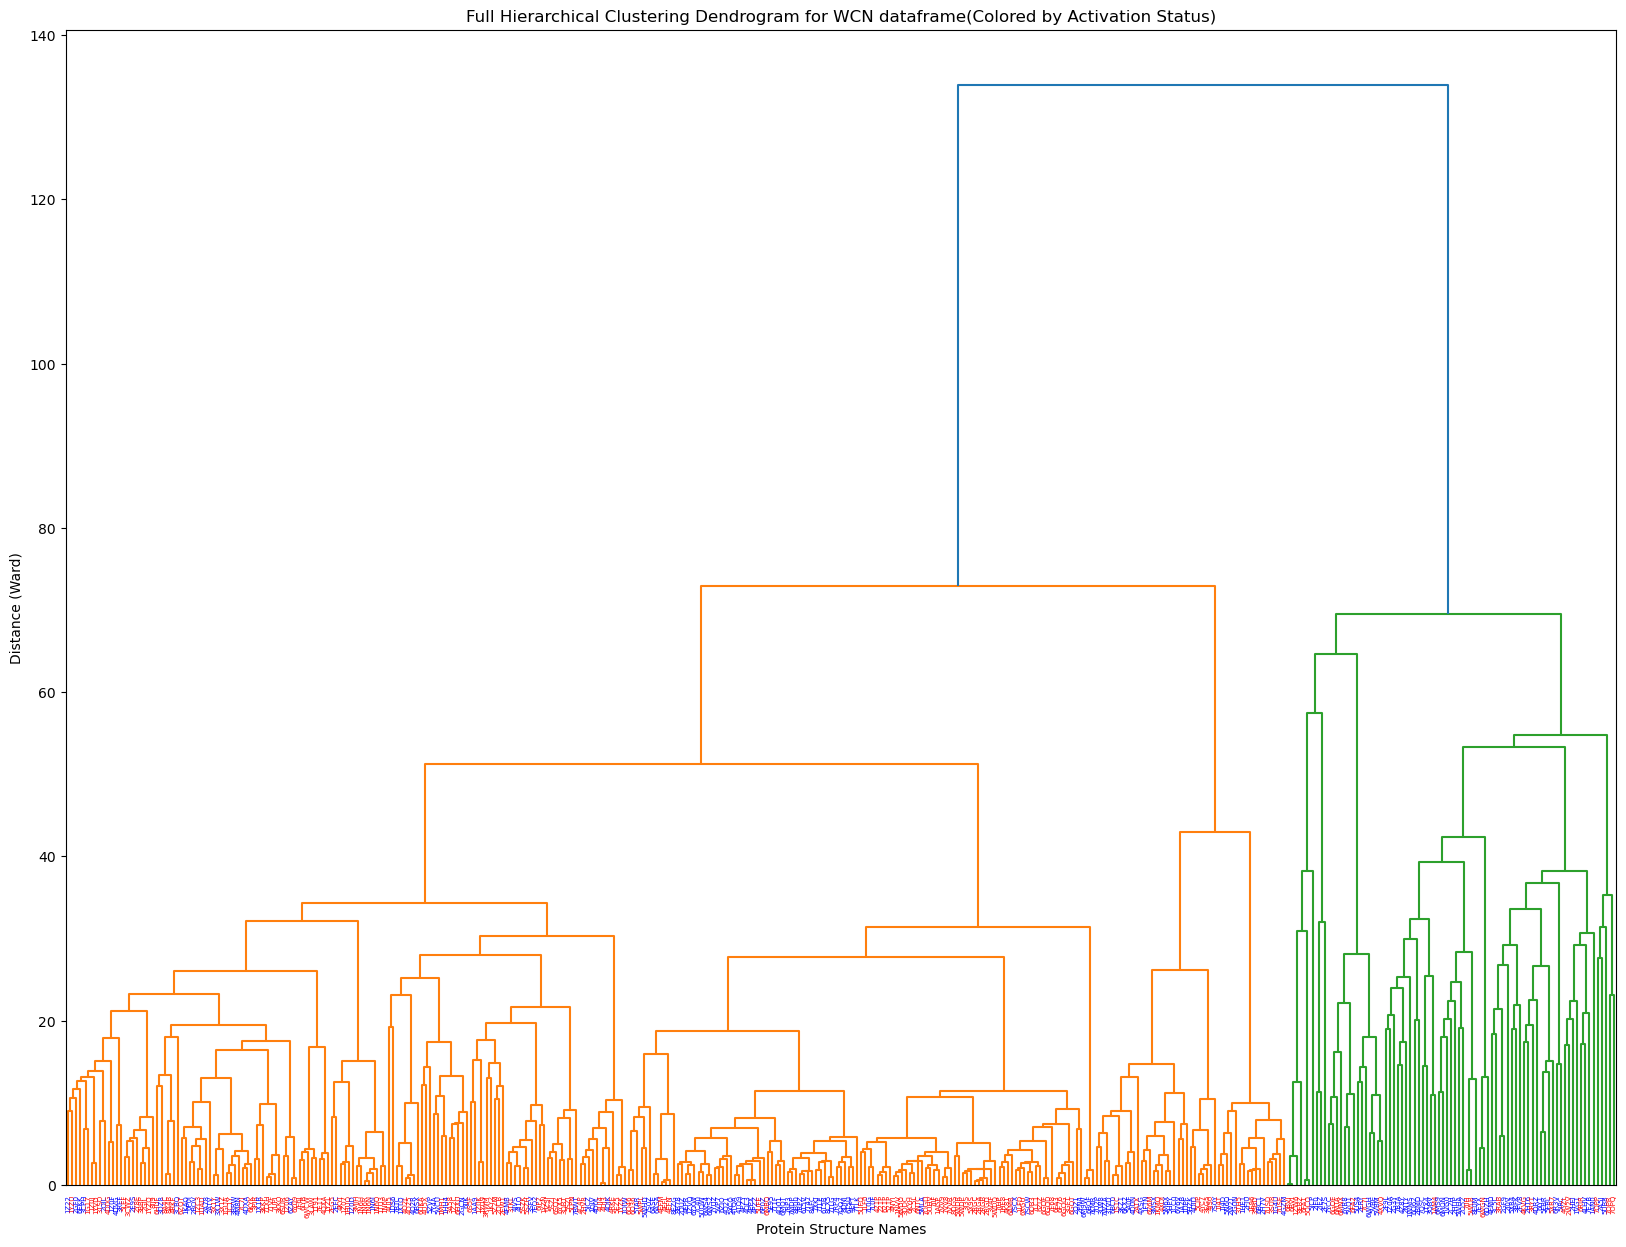

In [16]:
linked = linkage(feature_normalized, method='ward')


color_map = {
    "active": "red",
    "inactive": "blue"
}


labels = df["Unnamed: 0"].values


plt.figure(figsize=(20,15))
dendro_data = dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True, labels=labels)


ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    structure_id = lbl.get_text()
    color = color_map[merged_df[merged_df["Unnamed: 0"] == structure_id]["Read Activity Status"].values[0]]
    lbl.set_color(color)

plt.title('Full Hierarchical Clustering Dendrogram for WCN dataframe(Colored by Activation Status)')
plt.xlabel('Protein Structure Names')
plt.ylabel('Distance (Ward)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [17]:
merged_df = pd.merge(feature_normalized_df, metadata_df, left_on=protein_codes, right_on="Unnamed: 0")


X = feature_normalized_df
y = merged_df["Read Activity Status"]


merged_df.head()

pos1:M    pos2:T    pos3:E   pos4:Y    pos5:K    pos6:L    pos7:V  \
0  0.877253  0.822723  1.092406  0.00000  0.112693  0.170658  0.010683   
1  0.460621  0.549048  0.705383  1.19877  0.547791  0.816144  0.934254   
2 -0.165170  0.190533  0.392275  0.58578  0.193777  0.286386  0.278049   
3  0.000000  0.000000  0.000000 -1.45079  0.000000  0.000000 -4.051603   
4  0.048560  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   

     pos8:V    pos9:V   pos10:G  ...  Number of ILE  Number of GLN  \
0 -0.015162 -0.075974  0.192912  ...             10              5   
1  0.970780  1.147667  0.849653  ...             11             11   
2  0.208847  0.059412  0.291119  ...             11             11   
3 -4.535948 -3.352216  0.000000  ...              8              6   
4  0.000000  0.000000 -3.652692  ...              8              6   

   Number of ASN  Number of HIS  Number of PHE  Number of ASP  Number of PRO  \
0              6            2.0              7             15           11.0   
1              4            3.0              5             14            3.0   
2              4            3.0              5             15            3.0   
3              5            2.0              8             11           12.0   
4              5            2.0              8             11           15.0   

   Number of ARG  Number of CYS  Number of TRP  
0             10            5.0            2.0  
1             12            3.0            NaN  
2             11            3.0            NaN  
3              5            5.0            1.0  
4              6            6.0            1.0  

[5 rows x 231 columns]

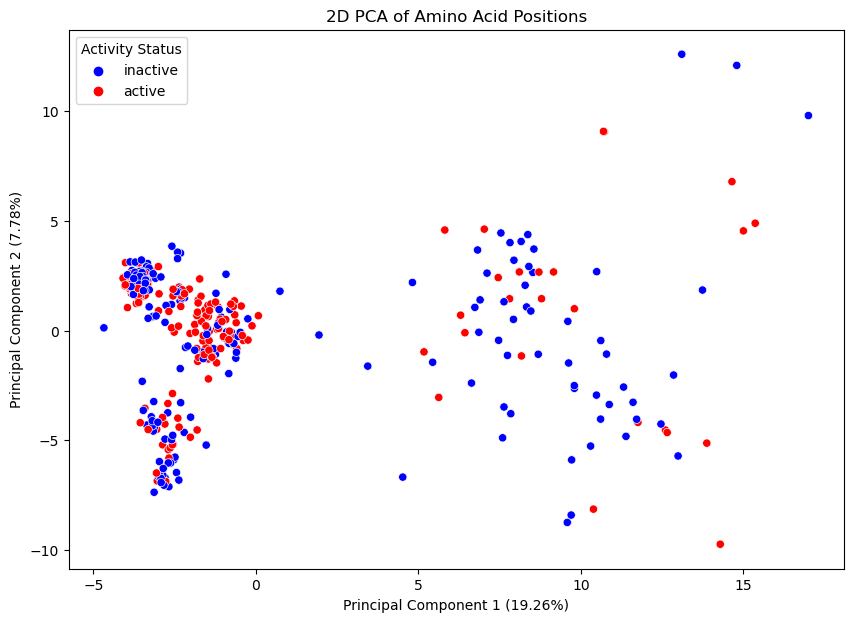

In [18]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X.iloc[:, :len(feature_normalized_df.columns)])
colors = {'active': 'red', 'inactive': 'blue'}


pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Activity Status'] = y


explained_variance = pca.explained_variance_ratio_


plt.figure(figsize=(10, 7))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Activity Status', data=pca_df, palette=colors)


plt.xlabel(f'Principal Component 1 ({explained_variance[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]*100:.2f}%)')

plt.title('2D PCA of Amino Acid Positions')
plt.show()

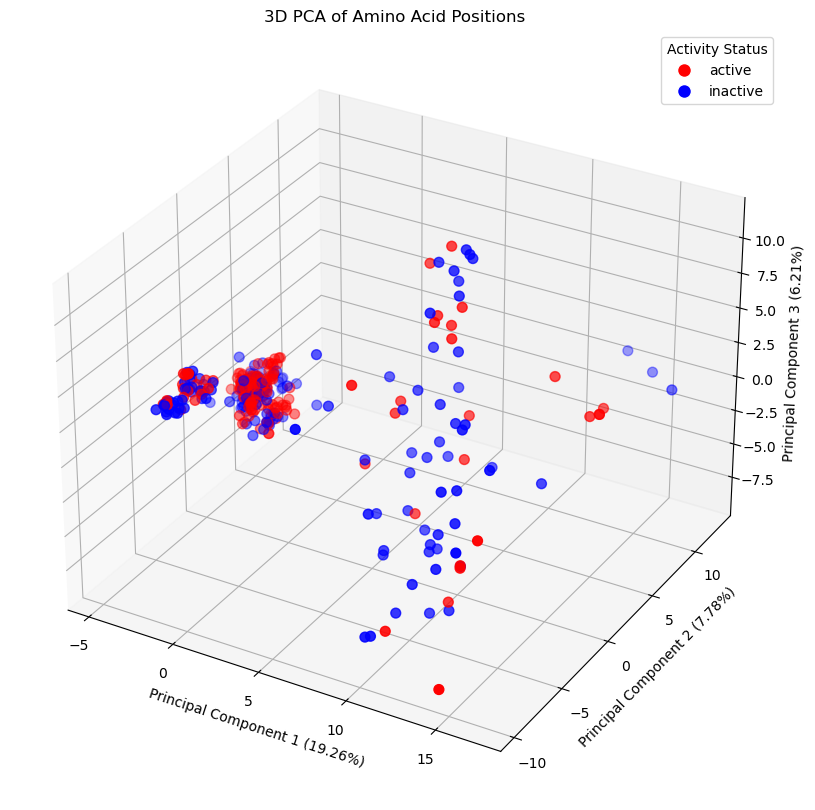

In [19]:
pca_3d = PCA(n_components=3)
principal_components_3d = pca_3d.fit_transform(X)


pca_df_3d = pd.DataFrame(data=principal_components_3d, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])
pca_df_3d['Activity Status'] = y


colors = {'active': 'red', 'inactive': 'blue'}


explained_variance_3d = pca_3d.explained_variance_ratio_


fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df_3d['Principal Component 1'], pca_df_3d['Principal Component 2'], pca_df_3d['Principal Component 3'], c=pca_df_3d["Activity Status"].map(colors), s=50, label=pca_df_3d["Activity Status"].unique())
ax.set_xlabel(f'Principal Component 1 ({explained_variance_3d[0]*100:.2f}%)')
ax.set_ylabel(f'Principal Component 2 ({explained_variance_3d[1]*100:.2f}%)')
ax.set_zlabel(f'Principal Component 3 ({explained_variance_3d[2]*100:.2f}%)')
ax.set_title('3D PCA of Amino Acid Positions')

legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=status, markersize=10, markerfacecolor=colors[status]) for status in colors]
ax.legend(handles=legend_handles, title='Activity Status')

plt.show()

C:\Users\Lympha\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Lympha\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


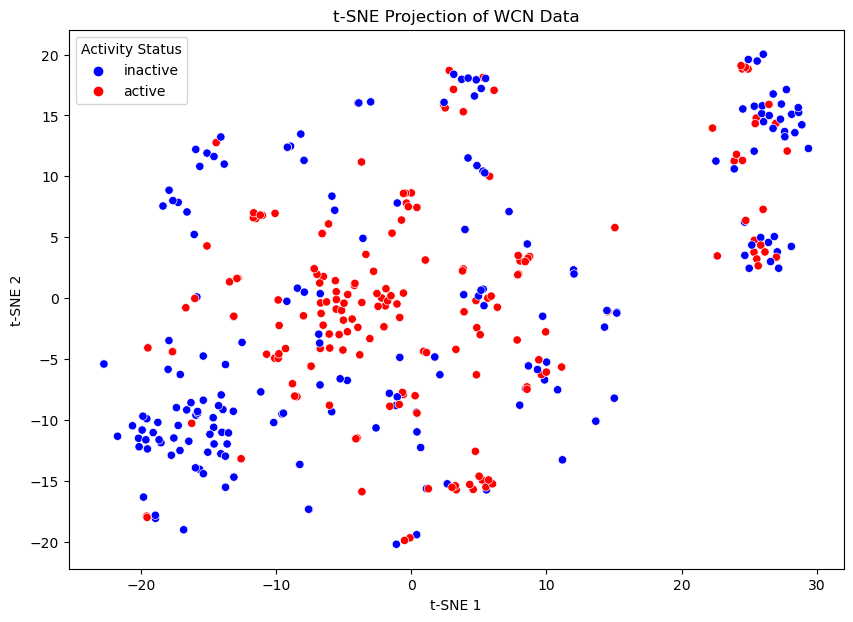

In [20]:
tsne = TSNE(n_components=2, random_state=1)
tsne_2d = tsne.fit_transform(X)


tsne_df = pd.DataFrame(data=tsne_2d, columns=['t-SNE 1', 't-SNE 2'])
tsne_df['Activity Status'] = y


plt.figure(figsize=(10, 7))
sns.scatterplot(x='t-SNE 1', y='t-SNE 2', hue='Activity Status', data=tsne_df, palette={"active": "red", "inactive": "blue"})
plt.title('t-SNE Projection of WCN Data')
plt.show()

In [21]:
label_encoder = LabelEncoder()
y_factorized = label_encoder.fit_transform(y)


rf_clf = RandomForestClassifier(n_estimators=100, random_state=1)
rf_clf.fit(X.iloc[:, :len(feature_normalized_df.columns)], y_factorized)


feature_importances = rf_clf.feature_importances_


importance_df = pd.DataFrame({
    'Amino Acid Position': X.columns[:len(feature_normalized_df.columns)],
    'Importance': feature_importances
})


sorted_importance_df = importance_df.sort_values(by='Importance', ascending=False)


top_n = 15
selected_aminoacids = sorted_importance_df['Amino Acid Position'][:top_n]
sorted_importance_df

Amino Acid Position  Importance
59              pos60:G    0.059047
34              pos35:T    0.040792
58              pos59:A    0.038206
57              pos58:T    0.034480
11              pos12:G    0.031030
..                  ...         ...
174            pos175:D    0.000000
173            pos174:P    0.000000
171            pos172:N    0.000000
169            pos170:K    0.000000
188            pos189:S    0.000000

[189 rows x 2 columns]

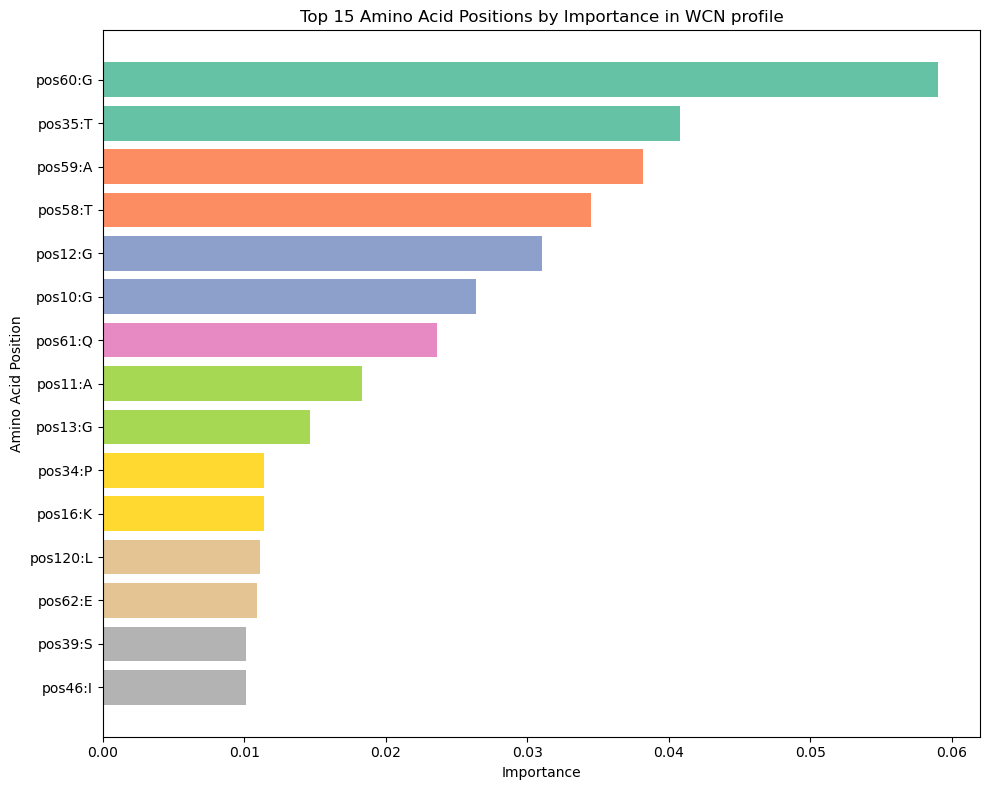

In [22]:
top_features = sorted_importance_df.head(top_n)


colors = cm.Set2(np.linspace(0, 1, top_n))


plt.figure(figsize=(10, 8))
bars = plt.barh(top_features['Amino Acid Position'], top_features['Importance'], color=colors)
plt.gca().invert_yaxis()  # to have the most important feature at the top
plt.title('Top {} Amino Acid Positions by Importance in WCN profile'.format(top_n))
plt.xlabel('Importance')
plt.ylabel('Amino Acid Position')
plt.tight_layout()
plt.show()


C:\Users\Lympha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Lympha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Lympha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `k

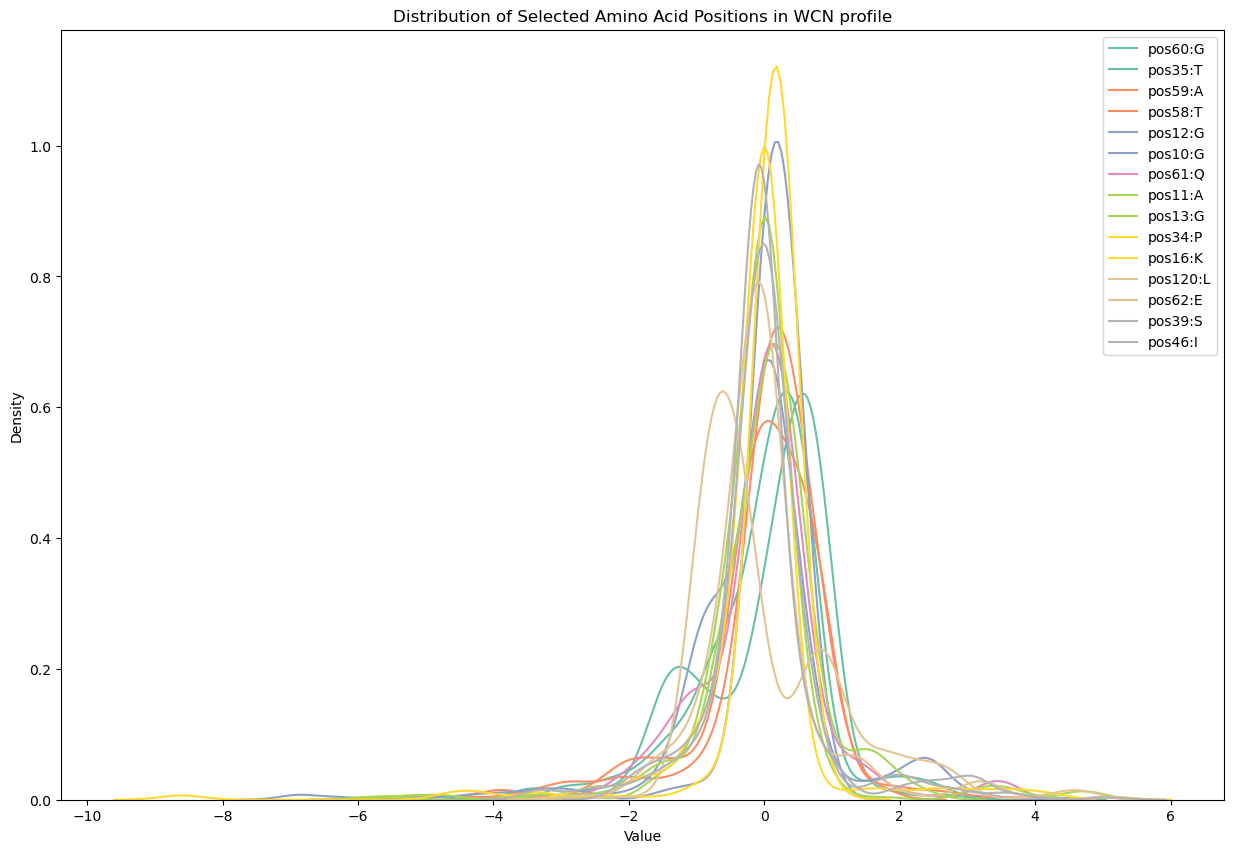

In [23]:
colors = cm.Set2(np.linspace(0, 1, len(selected_aminoacids)))


hex_colors = [to_hex(color) for color in colors]


color_dict = dict(zip(selected_aminoacids, hex_colors))


plt.figure(figsize=(15, 10))
for position in selected_aminoacids:
    sns.distplot(X[position], label=position, hist=False, color=color_dict[position])

plt.title('Distribution of Selected Amino Acid Positions in WCN profile')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


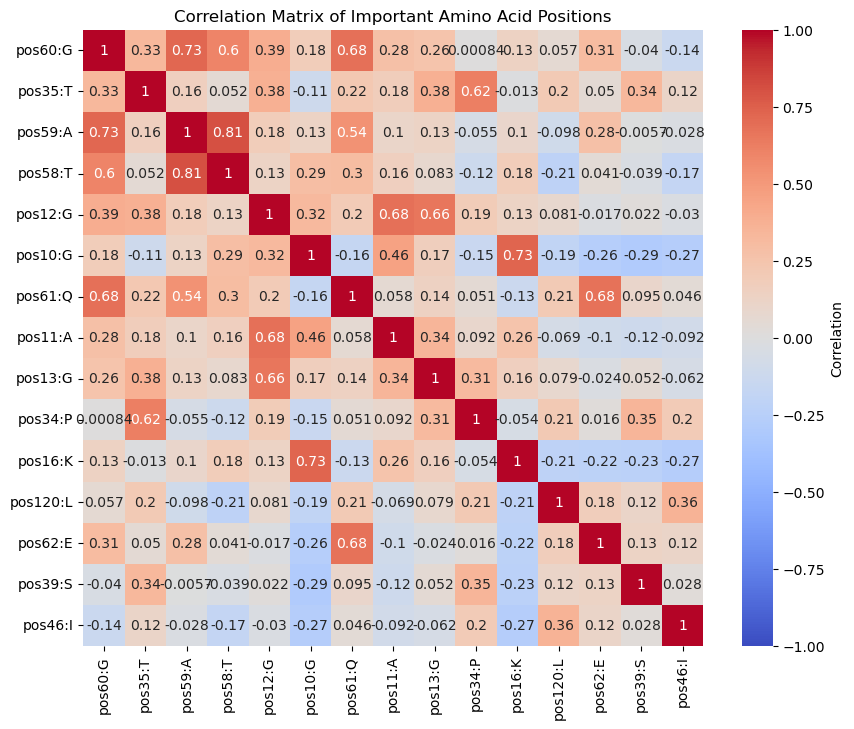

In [24]:
selected_correlation_matrix = correlation_matrix.loc[selected_aminoacids, selected_aminoacids]


plt.figure(figsize=(10, 8))
sns.heatmap(selected_correlation_matrix, cmap="coolwarm", annot=True, vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix of Important Amino Acid Positions')
plt.show()

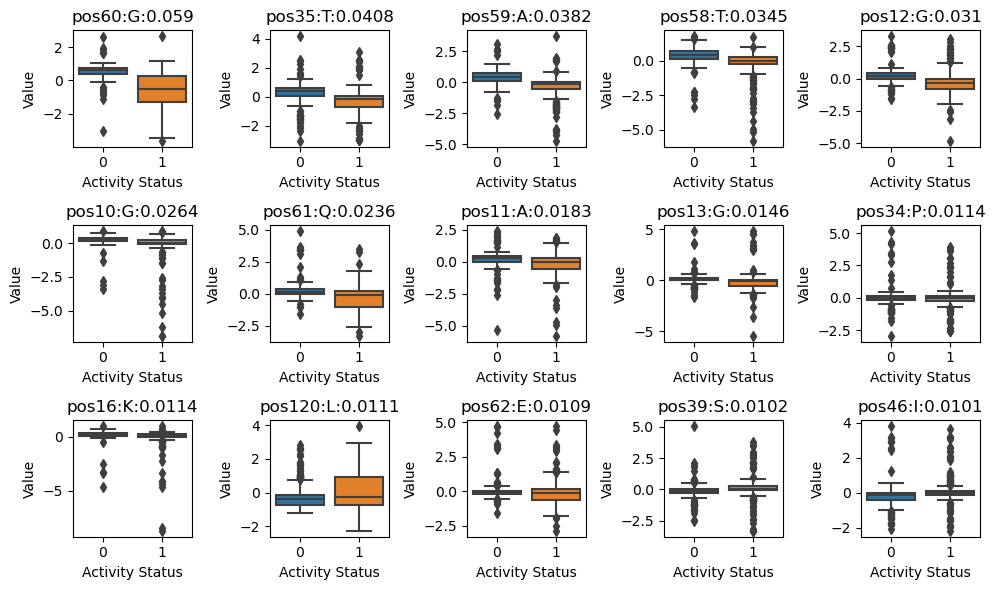

In [25]:
plt.figure(figsize=(10, 6))
for idx, position in enumerate(selected_aminoacids):
    plt.subplot(3, 5, idx+1)
    sns.boxplot(x=y_factorized, y=X[position])
    plt.title(f'{position}:{round(sorted_importance_df.iloc[idx, sorted_importance_df.columns.get_loc("Importance")], 4)}')
    plt.xlabel('Activity Status')
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

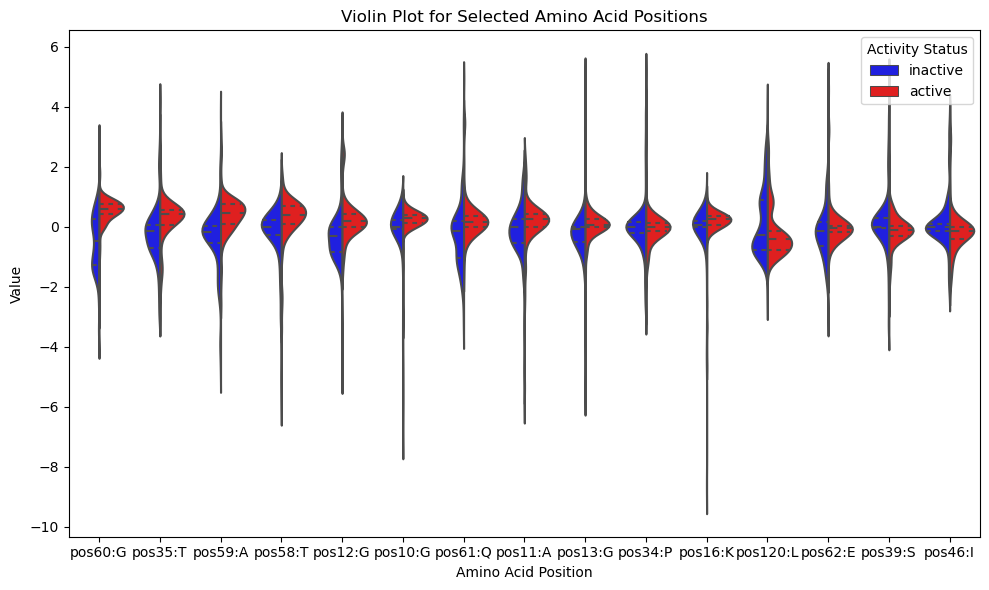

In [26]:
melted_data_selected = pd.melt(X[selected_aminoacids], value_vars=selected_aminoacids)
melted_data_selected['Activity Status'] = np.tile(y, len(selected_aminoacids))
colors = {'active': 'red', 'inactive': 'blue'}


plt.figure(figsize=(10, 6))
sns.violinplot(x="variable", y="value", hue="Activity Status", data=melted_data_selected, split=True, inner="quart", palette=colors)
plt.title('Violin Plot for Selected Amino Acid Positions')
plt.xlabel('Amino Acid Position')
plt.ylabel('Value')
plt.legend(title='Activity Status')
plt.tight_layout()
plt.show()

In [27]:
active_data = X[y == "active"][selected_aminoacids]
inactive_data = X[y == "inactive"][selected_aminoacids]


t_stats = []
p_values = []

for position in selected_aminoacids:
    t_stat, p_value = ttest_ind(active_data[position], inactive_data[position])
    t_stats.append(t_stat)
    p_values.append(p_value)


t_test_results = pd.DataFrame({
    'Amino Acid Position': selected_aminoacids,
    'T-Statistic': t_stats,
    'P-Value': p_values
})

t_test_results

Amino Acid Position  T-Statistic       P-Value
59              pos60:G    13.176259  6.675951e-33
34              pos35:T     5.827262  1.205267e-08
58              pos59:A     8.856576  3.227692e-17
57              pos58:T     7.007051  1.118724e-11
11              pos12:G     5.871487  9.444863e-09
9               pos10:G     4.428541  1.242859e-05
60              pos61:Q     6.263025  1.024952e-09
10              pos11:A     4.233321  2.892461e-05
12              pos13:G     2.687185  7.523126e-03
33              pos34:P     0.469921  6.386814e-01
15              pos16:K     3.140513  1.818905e-03
119            pos120:L    -3.424862  6.823792e-04
61              pos62:E     1.833182  6.755964e-02
38              pos39:S    -2.224189  2.672430e-02
45              pos46:I    -2.984954  3.020169e-03

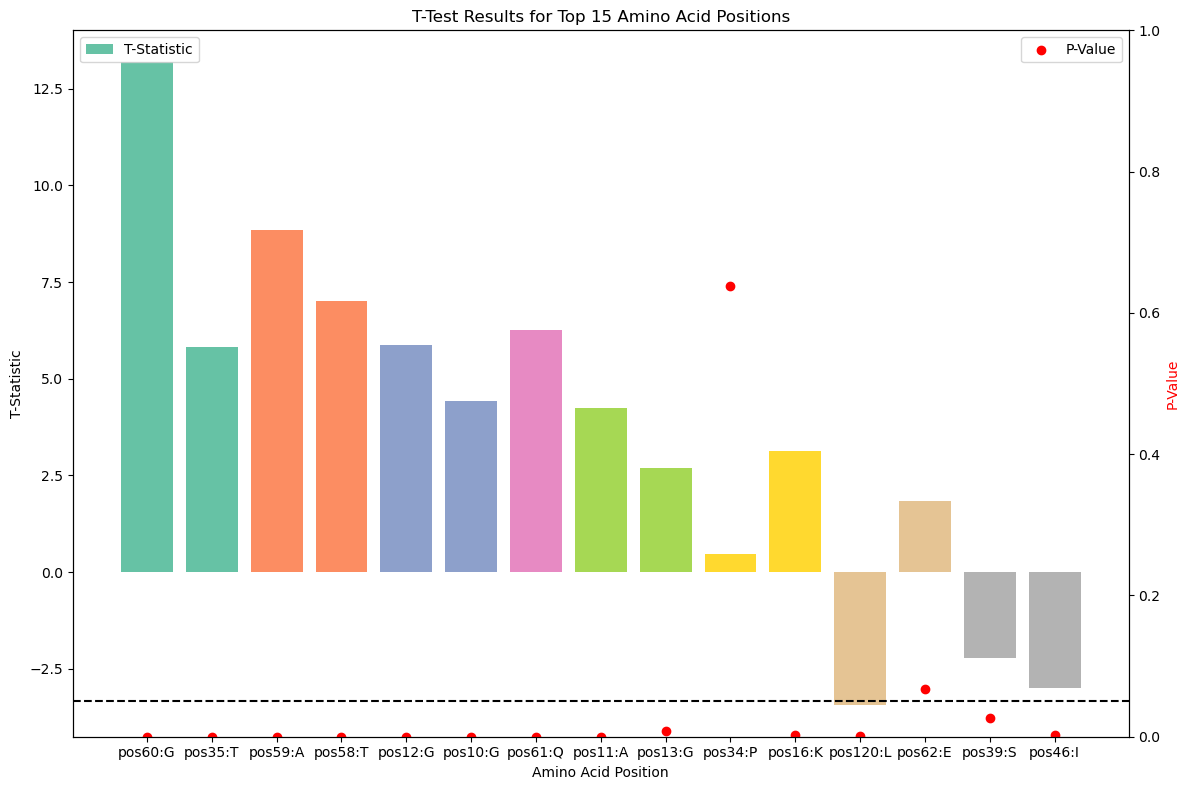

In [28]:
colors = cm.Set2(np.linspace(0, 1, top_n))


fig, ax1 = plt.subplots(figsize=(12, 8))


bars = ax1.bar(t_test_results['Amino Acid Position'], t_test_results['T-Statistic'], color=colors, label='T-Statistic')


ax2 = ax1.twinx()
ax2.scatter(t_test_results['Amino Acid Position'], t_test_results['P-Value'], color='red', marker='o', label='P-Value')
ax2.axhline(y=0.05, color='black', linestyle='--')  # significance threshold


ax2.set_ylim(0, 1)


ax1.set_ylabel('T-Statistic')
ax2.set_ylabel('P-Value', color='red')
ax1.set_xlabel('Amino Acid Position')
ax1.set_title(f'T-Test Results for Top {top_n} Amino Acid Positions')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [29]:
bonferroni_corrected_pvalues = multipletests(t_test_results['P-Value'], method='bonferroni')[1]


fdr_corrected_pvalues = multipletests(t_test_results['P-Value'], method='fdr_bh')[1]


t_test_results['Bonferroni Corrected P-Value'] = bonferroni_corrected_pvalues
t_test_results['FDR Corrected P-Value'] = fdr_corrected_pvalues

t_test_results

Amino Acid Position  T-Statistic       P-Value  \
59              pos60:G    13.176259  6.675951e-33   
34              pos35:T     5.827262  1.205267e-08   
58              pos59:A     8.856576  3.227692e-17   
57              pos58:T     7.007051  1.118724e-11   
11              pos12:G     5.871487  9.444863e-09   
9               pos10:G     4.428541  1.242859e-05   
60              pos61:Q     6.263025  1.024952e-09   
10              pos11:A     4.233321  2.892461e-05   
12              pos13:G     2.687185  7.523126e-03   
33              pos34:P     0.469921  6.386814e-01   
15              pos16:K     3.140513  1.818905e-03   
119            pos120:L    -3.424862  6.823792e-04   
61              pos62:E     1.833182  6.755964e-02   
38              pos39:S    -2.224189  2.672430e-02   
45              pos46:I    -2.984954  3.020169e-03   

     Bonferroni Corrected P-Value  FDR Corrected P-Value  
59                   1.001393e-31           1.001393e-31  
34                   1.807901e-07           3.013168e-08  
58                   4.841538e-16           2.420769e-16  
57                   1.678085e-10           5.593618e-11  
11                   1.416729e-07           2.833459e-08  
9                    1.864289e-04           2.663270e-05  
60                   1.537428e-08           3.843569e-09  
10                   4.338691e-04           5.423364e-05  
12                   1.128469e-01           9.403907e-03  
33                   1.000000e+00           6.386814e-01  
15                   2.728357e-02           2.728357e-03  
119                  1.023569e-02           1.137299e-03  
61                   1.000000e+00           7.238532e-02  
38                   4.008645e-01           3.083573e-02  
45                   4.530254e-02           4.118413e-03

In [30]:
t_test_results.to_clipboard()

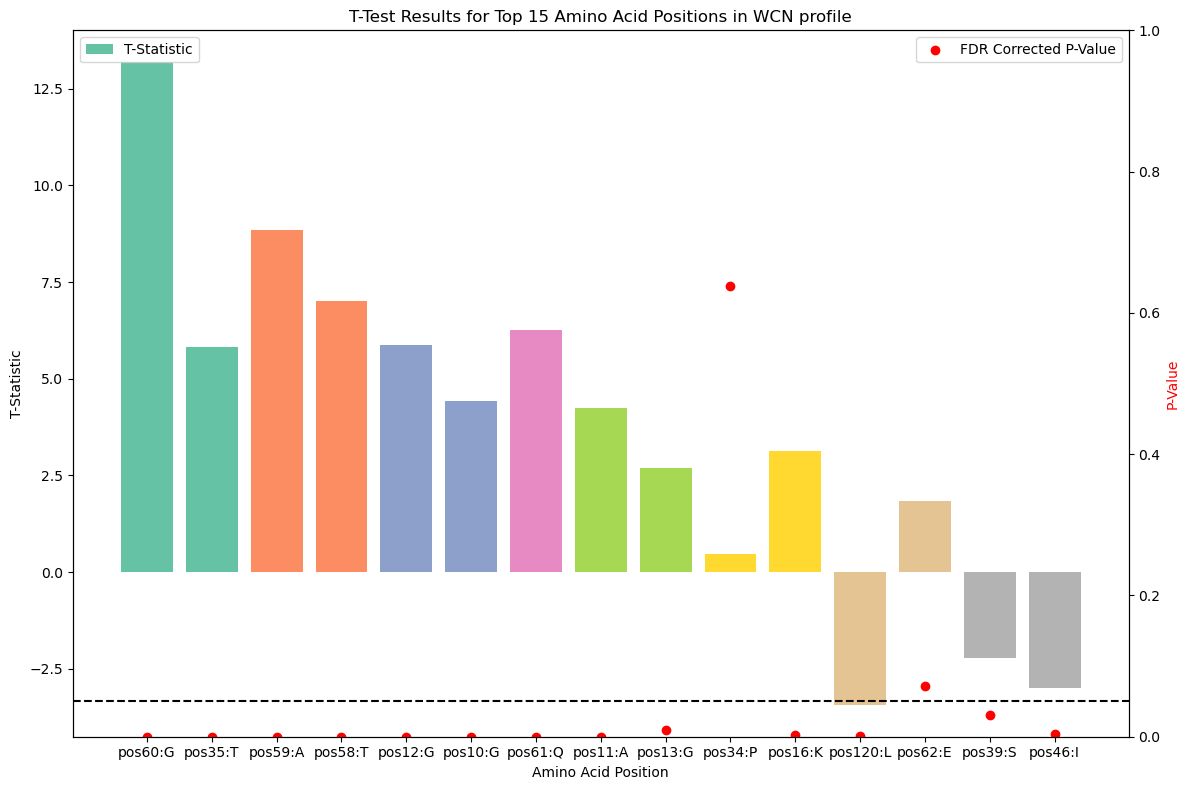

In [31]:
colors = cm.Set2(np.linspace(0, 1, top_n))


fig, ax1 = plt.subplots(figsize=(12,8))


bars = ax1.bar(t_test_results['Amino Acid Position'], t_test_results['T-Statistic'], color=colors, label='T-Statistic')


ax2 = ax1.twinx()
ax2.scatter(t_test_results['Amino Acid Position'], t_test_results['FDR Corrected P-Value'], color='red', marker='o', label='FDR Corrected P-Value')
ax2.axhline(y=0.05, color='black', linestyle='--')  # significance threshold


ax2.set_ylim(0, 1)


ax1.set_ylabel('T-Statistic')
ax2.set_ylabel('P-Value', color='red')
ax1.set_xlabel('Amino Acid Position')
ax1.set_title(f'T-Test Results for Top {top_n} Amino Acid Positions in WCN profile')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()